[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-output.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np  # 고성능의 수치계산, 행렬이나 대규모 다차원 배열을 쉽게 처리하기 위한 라이브러리
import seaborn as sns  # 데이터 시각화를 위한 라이브러리

## 시각화를 위한 폰트 설정

In [5]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [6]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [8]:
df = pd.read_csv("data/상가정보_의료기관_201909.csv", low_memory=False)
df.shape  # (행, 열) 출력

(91335, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [10]:
# shift + tab: 공식문서 보기
# head 로 데이터를 미리보기 합니다.
df.head(1)  # 첫번째 위치의 데이터 

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873  하나산부인과  NaN         S       의료       S01       병원    S01B10   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   

                도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도         위도  
0  경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295  37.336344  

[1 rows x 39 columns]

In [11]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)  # 마지막 위치의 데이터

상가업소번호           상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
91334  16109073  천안김안과천안역본점의원  NaN         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314  김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

             위도  
91334  36.80664  

[1 rows x 39 columns]

In [12]:
# sample 로 미리보기를 합니다.
df.sample()

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
67546  21443170  미래여성의원  NaN         S       의료       S01       병원    S01B10   

      상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
67546     산부인과   Q86201  ...  4623010600112950011008292  NaN   

                    도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
67546  전라남도 광양시 중마중앙로 142  545879.0  57786.0  NaN  NaN  NaN  127.698332   

              위도  
67546  34.942924  

[1 rows x 39 columns]

## 데이터 요약하기

### 요약정보

In [15]:
# info로 데이터의 요약을 봅니다. (Columns, Non-Null Count: 결측치 때문에 column마다 값 다름, Data type, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [17]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [19]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [21]:
# 각 column의 결측치 개수 출력
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

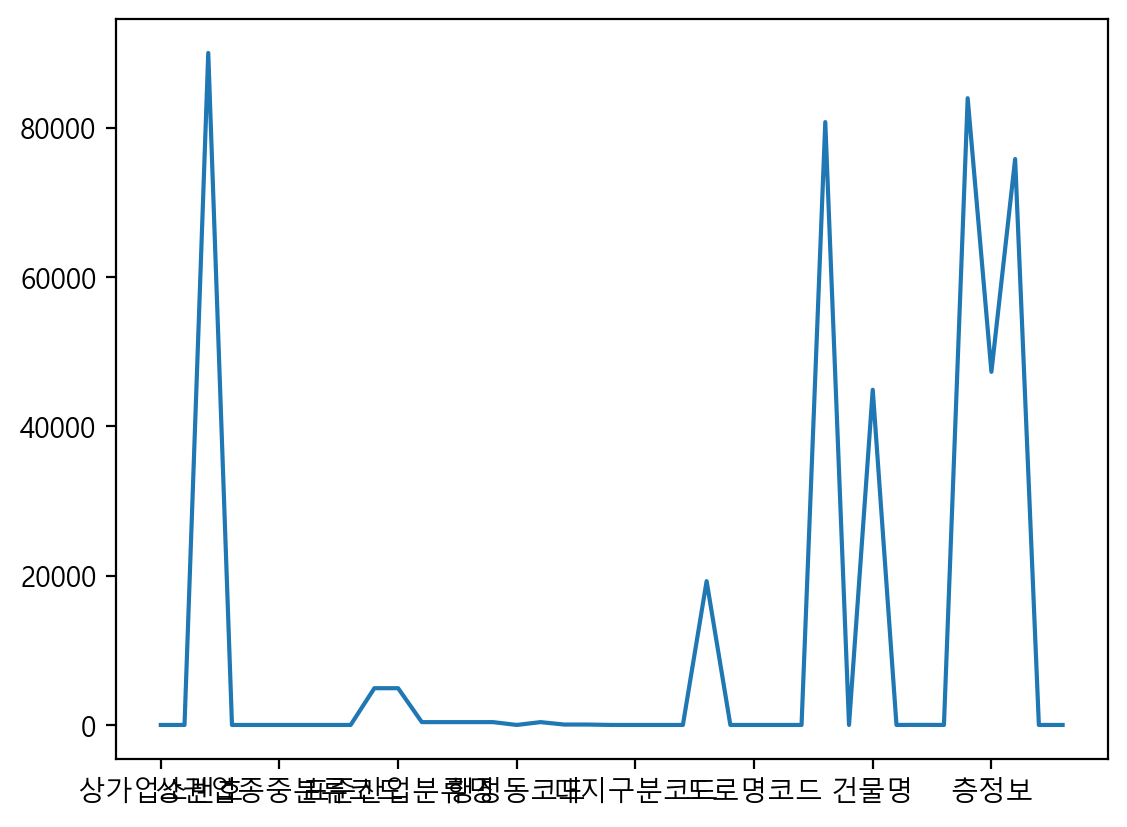

In [22]:
# 결측치 갯수 시각화(기본값: line 그래프)
df.isnull().sum().plot() 

<Axes: >

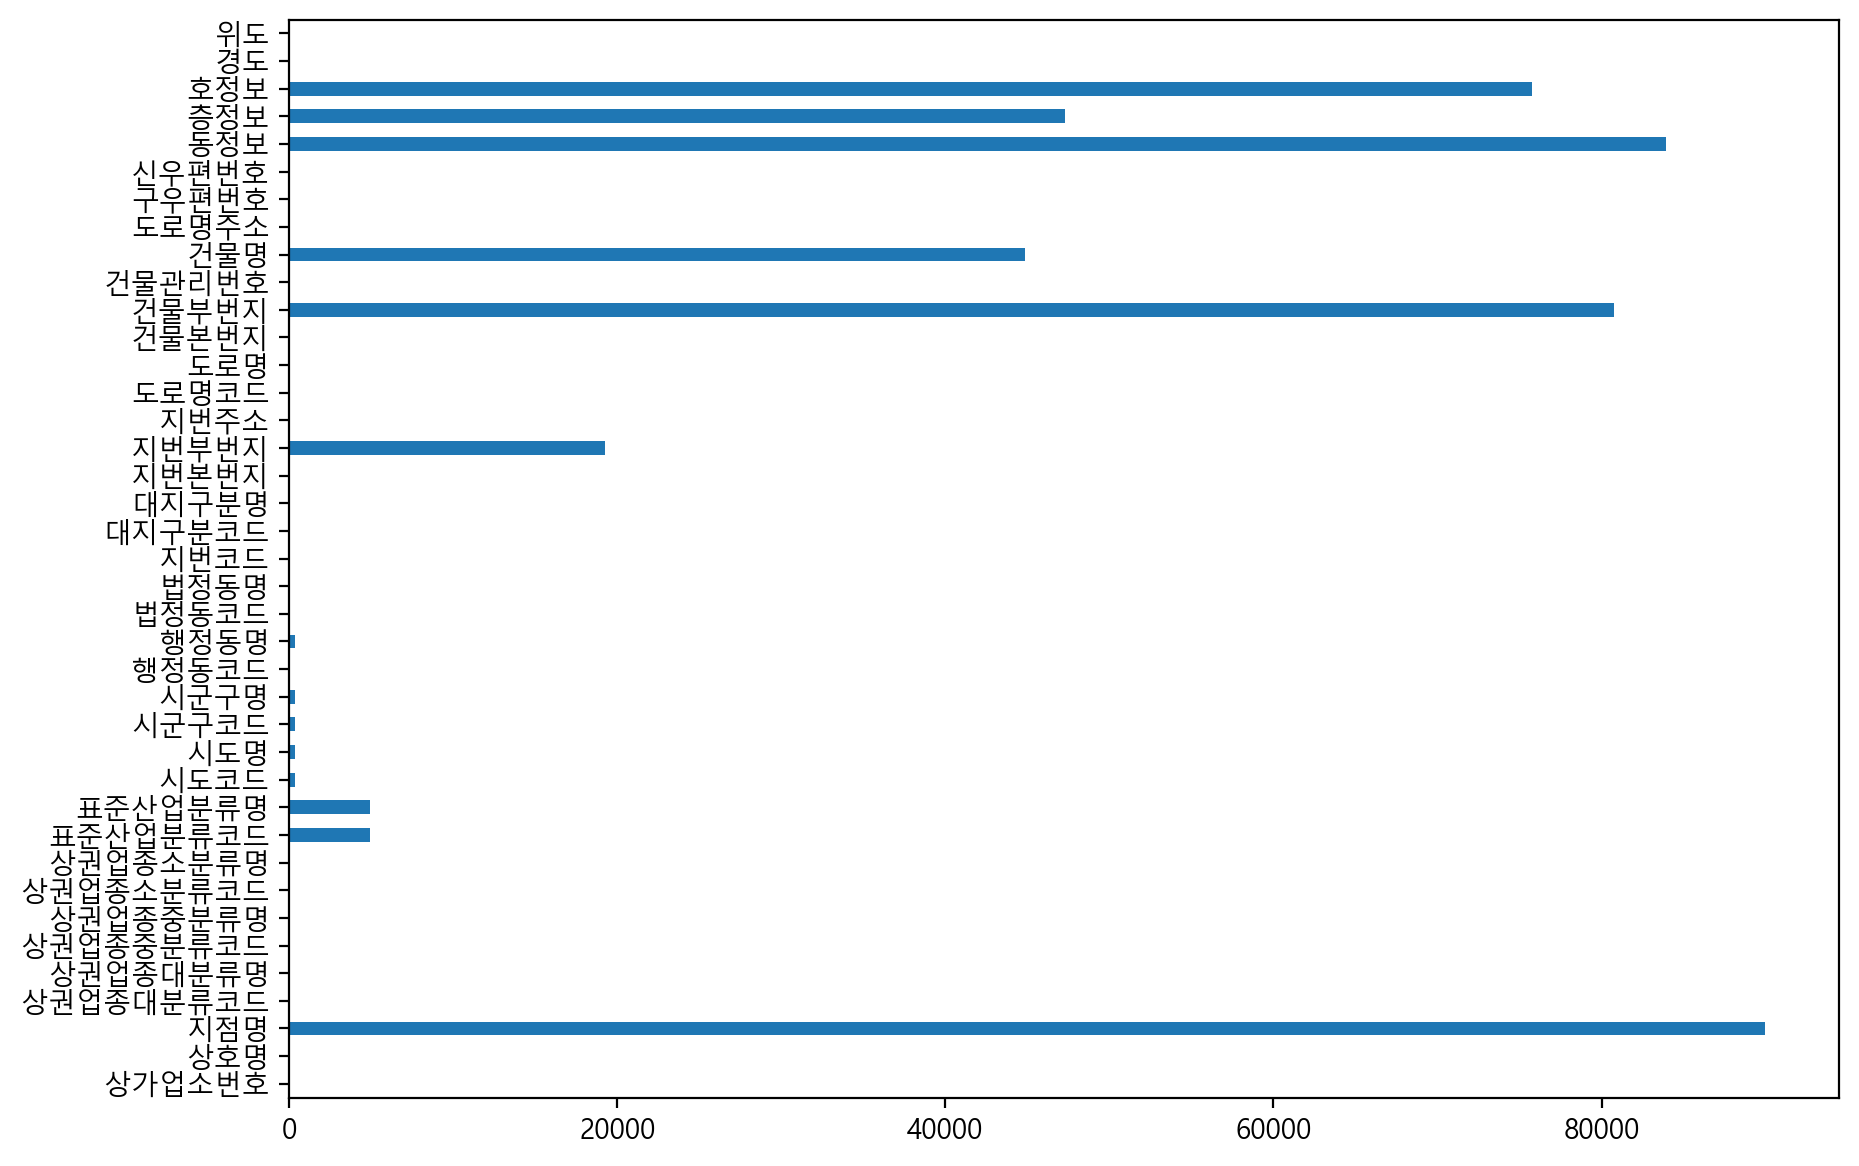

In [23]:
# plot.bar: 막대그래프
df.isnull().sum().plot.barh(figsize=(10, 7))  # 세로 막대형 그래프

In [24]:
# reset_index: 데이터프레임으로 변환
df_null_count = df.isnull().sum().reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 컬럼명 변경하기

In [26]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 정렬하기

In [28]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬,
# 결측치가 많은 순으로 상위 10개만 출력
df_null_head = df_null_count.sort_values(
    by="결측치수", ascending=False).head(10)  # 결측치수 기준 내림차순 정렬
df_null_head

컬럼명   결측치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75784
35       층정보  47291
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922
11      시도코드    379

## 특정 컬럼만 불러오기

In [30]:
# 지점명 컬럼을 불러옵니다.
df["지점명"].head()  # NaN: 결측치

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [31]:
# 결측지수 상위 10개의 컬럼명 리스트화
drop_columns = df_null_head["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [32]:
# drop_columns의 컬럼 정보만 df에서 가져옵니다.
df[drop_columns].head()  

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN    4      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN    5      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN    1      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

## 제거하기

In [34]:
print(df.shape)
# drop_columns 삭제 (axis=1: 열 기준 삭제, axis=0: 행 기준 삭제)
df = df.drop(columns=drop_columns, axis=1)  
print(df.shape)

(91335, 39)
(91335, 29)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [38]:
# 평균값
df["위도"].mean()

36.62471119236685

In [39]:
# 중앙값
df["위도"].median()

37.2346523177033

In [40]:
# 최댓값
df["위도"].max()

38.4996585705598

In [41]:
# 최솟값
df["위도"].min()

33.2192896688307

In [42]:
# 개수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값,
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [44]:
# 위도를 describe로 요약해 봅니다.
df["위도"].describe()  # series datatype

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [45]:
# 2개의 컬럼을 describe 로 요약합니다.
df[["위도", "경도"]].describe()  # Dataframe

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [46]:
# 숫자 데이터타입 요약
df.describe(include="number")

상가업소번호         시군구코드         행정동코드         법정동코드          지번코드  \
count  9.133500e+04  90956.000000  9.133500e+04  9.128000e+04  9.133500e+04   
mean   2.121818e+07  32898.381877  3.293232e+09  3.293385e+09  3.293191e+18   
std    5.042828e+06  12985.393171  1.297387e+09  1.297706e+09  1.297393e+18   
min    2.901108e+06  11110.000000  1.111052e+09  1.111010e+09  1.111010e+18   
25%    2.001931e+07  26350.000000  2.635065e+09  2.635011e+09  2.635011e+18   
50%    2.211900e+07  41117.000000  4.111758e+09  4.111710e+09  4.111711e+18   
75%    2.480984e+07  43113.000000  4.311370e+09  4.311311e+09  4.311311e+18   
max    2.852470e+07  50130.000000  5.013061e+09  5.013032e+09  5.013061e+18   

             대지구분코드         지번본번지         도로명코드         건물본번지          구우편번호  \
count  91335.000000  91335.000000  9.133500e+04  91335.000000   91323.000000   
mean       1.001336    587.534549  3.293207e+11    251.200482  428432.911085   
std        0.036524    582.519364  1.297391e+11    477.456487  193292.339066   
min        1.000000      1.000000  1.111020e+11      0.000000  100011.000000   
25%        1.000000    162.000000  2.635042e+11     29.000000  302120.000000   
50%        1.000000    462.000000  4.111743e+11     92.000000  440300.000000   
75%        1.000000    858.000000  4.311332e+11    257.000000  602811.000000   
max        2.000000   7338.000000  5.013049e+11   8795.000000  799801.000000   

             신우편번호            경도            위도  
count  91333.00000  91335.000000  91335.000000  
mean   28085.47698    127.487524     36.624711  
std    18909.01455      0.842877      1.041361  
min     1000.00000    124.717632     33.219290  
25%    11681.00000    126.914297     35.811830  
50%    24353.00000    127.084550     37.234652  
75%    46044.00000    128.108919     37.507463  
max    63643.00000    130.909912     38.499659

In [47]:
# 문자열 데이터타입 요약
df.describe(include="object")

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                           건물관리번호                  도로명주소  
count                       91335                  91335  
unique                      54142                  54031  
top     1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10  
freq                          198                    198

In [48]:
# 모든 데이터 요약 (결측치 제와)
df.describe(include="all")

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   9.133500e+04  91335     91335    91335     91335    91335     91335   
unique           NaN  56910         1        1         5        5        34   
top              NaN     리원         S       의료       S01       병원    S02A01   
freq             NaN    152     91335    91335     60774    60774     18964   
mean    2.121818e+07    NaN       NaN      NaN       NaN      NaN       NaN   
std     5.042828e+06    NaN       NaN      NaN       NaN      NaN       NaN   
min     2.901108e+06    NaN       NaN      NaN       NaN      NaN       NaN   
25%     2.001931e+07    NaN       NaN      NaN       NaN      NaN       NaN   
50%     2.211900e+07    NaN       NaN      NaN       NaN      NaN       NaN   
75%     2.480984e+07    NaN       NaN      NaN       NaN      NaN       NaN   
max     2.852470e+07    NaN       NaN      NaN       NaN      NaN       NaN   

       상권업종소분류명    시도명         시군구코드  ...                  지번주소         도로명코드  \
count     91335  90956  90956.000000  ...                 91335  9.133500e+04   
unique       34     17           NaN  ...                 53118           NaN   
top          약국    경기도           NaN  ...  서울특별시 동대문구 제기동 965-1           NaN   
freq      18964  21374           NaN  ...                   198           NaN   
mean        NaN    NaN  32898.381877  ...                   NaN  3.293207e+11   
std         NaN    NaN  12985.393171  ...                   NaN  1.297391e+11   
min         NaN    NaN  11110.000000  ...                   NaN  1.111020e+11   
25%         NaN    NaN  26350.000000  ...                   NaN  2.635042e+11   
50%         NaN    NaN  41117.000000  ...                   NaN  4.111743e+11   
75%         NaN    NaN  43113.000000  ...                   NaN  4.311332e+11   
max         NaN    NaN  50130.000000  ...                   NaN  5.013049e+11   

                   도로명         건물본번지                     건물관리번호  \
count            91335  91335.000000                      91335   
unique           16610           NaN                      54142   
top     서울특별시 강남구 강남대로           NaN  1123010300109650001031604   
freq               326           NaN                        198   
mean               NaN    251.200482                        NaN   
std                NaN    477.456487                        NaN   
min                NaN      0.000000                        NaN   
25%                NaN     29.000000                        NaN   
50%                NaN     92.000000                        NaN   
75%                NaN    257.000000                        NaN   
max                NaN   8795.000000                        NaN   

                        도로명주소          구우편번호        신우편번호            경도  \
count                   91335   91323.000000  91333.00000  91335.000000   
unique                  54031            NaN          NaN           NaN   
top     서울특별시 동대문구 약령중앙로8길 10            NaN          NaN           NaN   
freq                      198            NaN          NaN           NaN   
mean                      NaN  428432.911085  28085.47698    127.487524   
std                       NaN  193292.339066  18909.01455      0.842877   
min                       NaN  100011.000000   1000.00000    124.717632   
25%                       NaN  302120.000000  11681.00000    126.914297   
50%                       NaN  440300.000000  24353.00000    127.084550   
75%                       NaN  602811.000000  46044.00000    128.108919   
max                       NaN  799801.000000  63643.00000    130.909912   

                  위도  
count   91335.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       36.624711  
std         1.041361  
min        33.219290  
25%        35.811830  
50%        37.234652  
75%        37.507463  
max        38.499659  

[11 rows x 29 columns]

### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.
* unique: 값의 종류가 몇 개인지를 보여줌

In [50]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [51]:
df["상권업종대분류명"].nunique()

1

 -> 상권업종대분류명은 1개의 값을 가지고 있고, 그 값은 "의료"입니다.

In [53]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [54]:
df["상권업종중분류명"].nunique()

5

-> 상권업종중분류명은 5개의 값을 가지고 있고, 그 값은 각각 병원, 약국/한약방, 수의업, 유사의료업, 의료관련서비스업입니다.

In [56]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [57]:
df["상권업종소분류명"].nunique()

34

In [58]:
# nunique 대신 len 을 사용할 수도 있습니다.
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [60]:
# 시도명의 각 value의 개수 출력
df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [61]:
# normalize=True: 전체에서 차지하는 비율 계산
df["시도명"].value_counts(normalize=True)

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

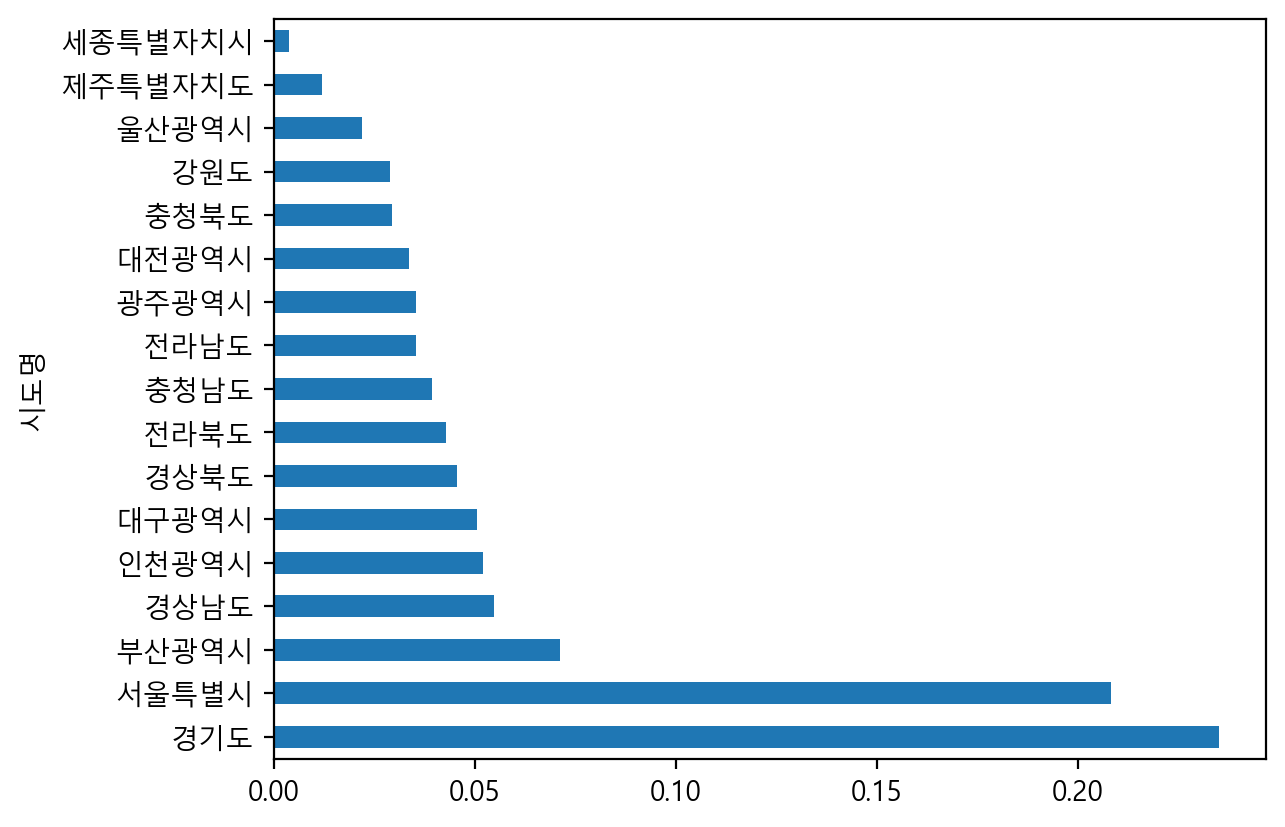

In [62]:
# 시도명의 value 개수를 막대그래프로 표현
df["시도명"].value_counts(normalize=True).plot.barh()

<Axes: ylabel='count'>

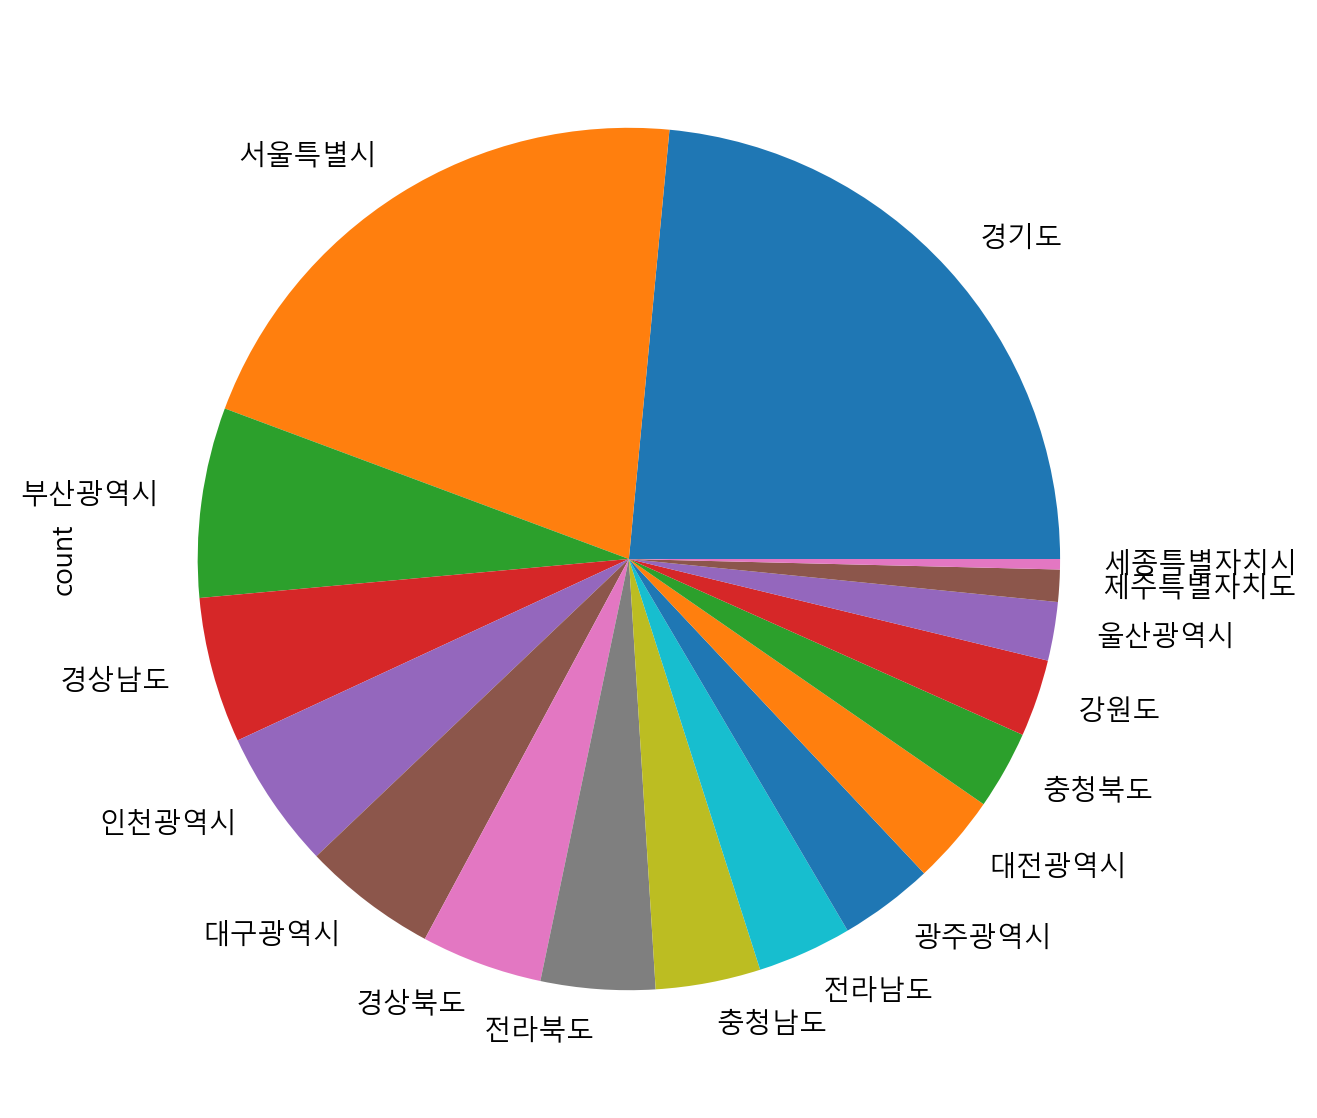

In [63]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["시도명"].value_counts().plot.pie(figsize=(7, 7))

<Axes: xlabel='count', ylabel='시도명'>

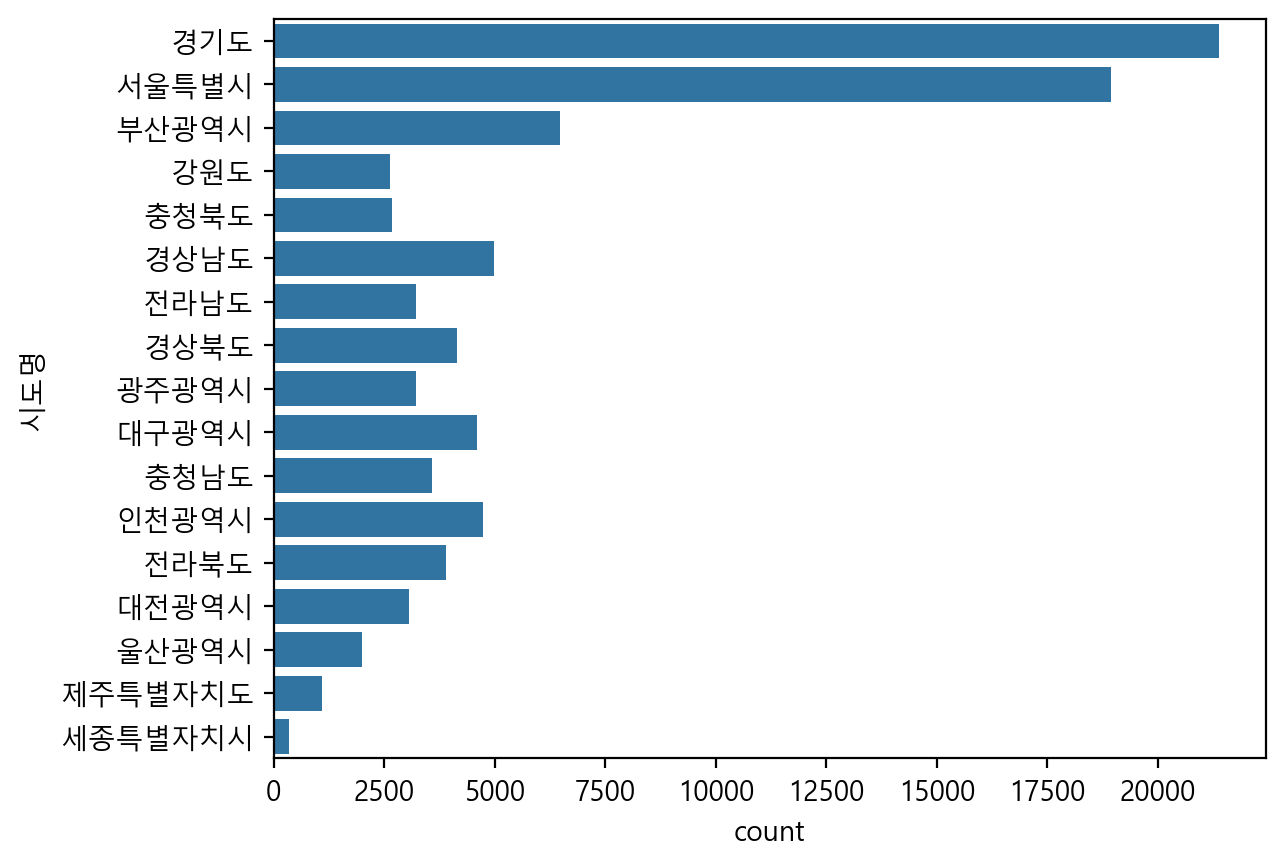

In [64]:
# seaborn은 대체로 x, y, data를 기본으로 넣어줘야 하지만 countplot은 x,y 중 하나만 넣어도 됩니다.
# seaborn의 장점: 고급 통계 기능을 그래프 내부에서 제공
# seaborn의 단점: 데이터 크기가 클수록 속도가 느림
sns.countplot(data=df, y="시도명")

In [65]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [66]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
df["상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [67]:
# normalize=True 를 사용해 비율을 구해봅니다.
df["상권업종중분류명"].value_counts(normalize=True)

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: ylabel='상권업종중분류명'>

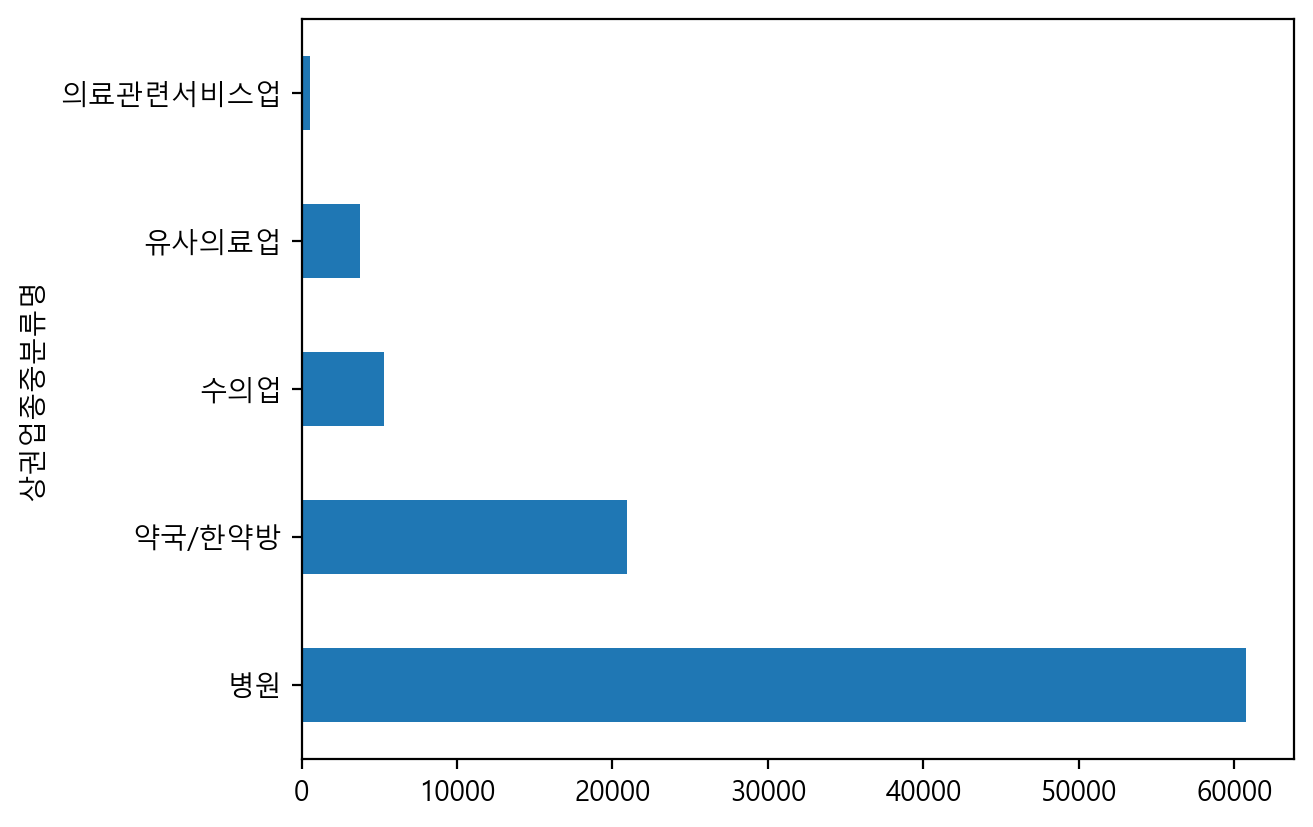

In [68]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
df["상권업종중분류명"].value_counts().plot.barh()

<Axes: ylabel='count'>

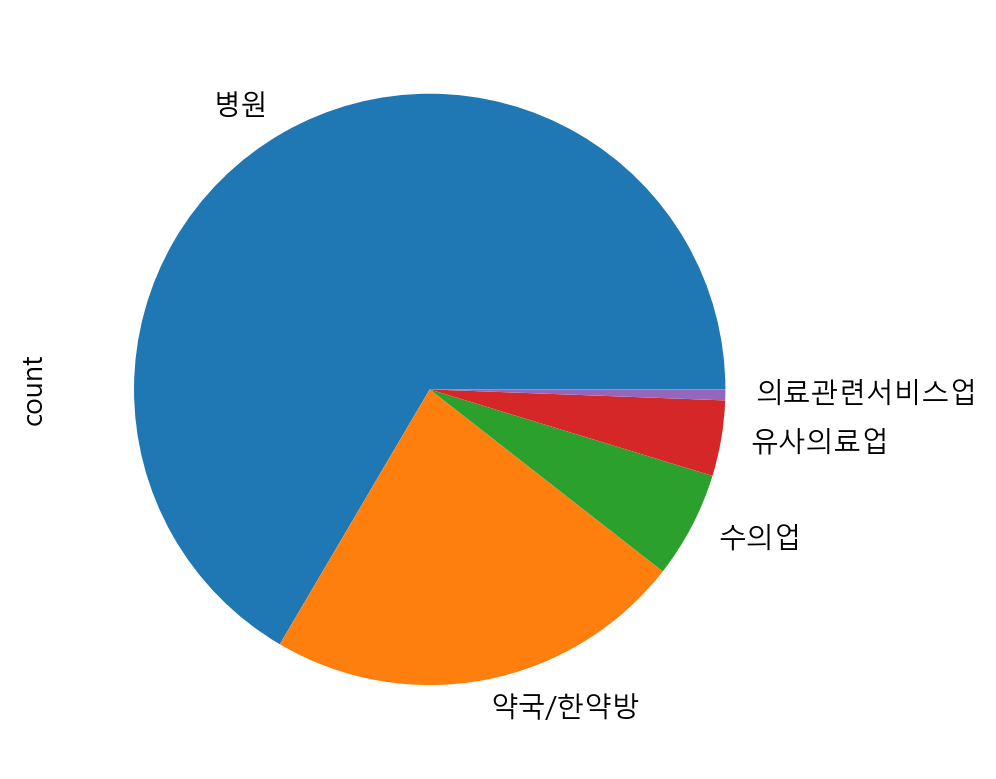

In [69]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["상권업종중분류명"].value_counts().plot.pie()

In [70]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
df["상권업종소분류명"].value_counts()

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: ylabel='상권업종소분류명'>

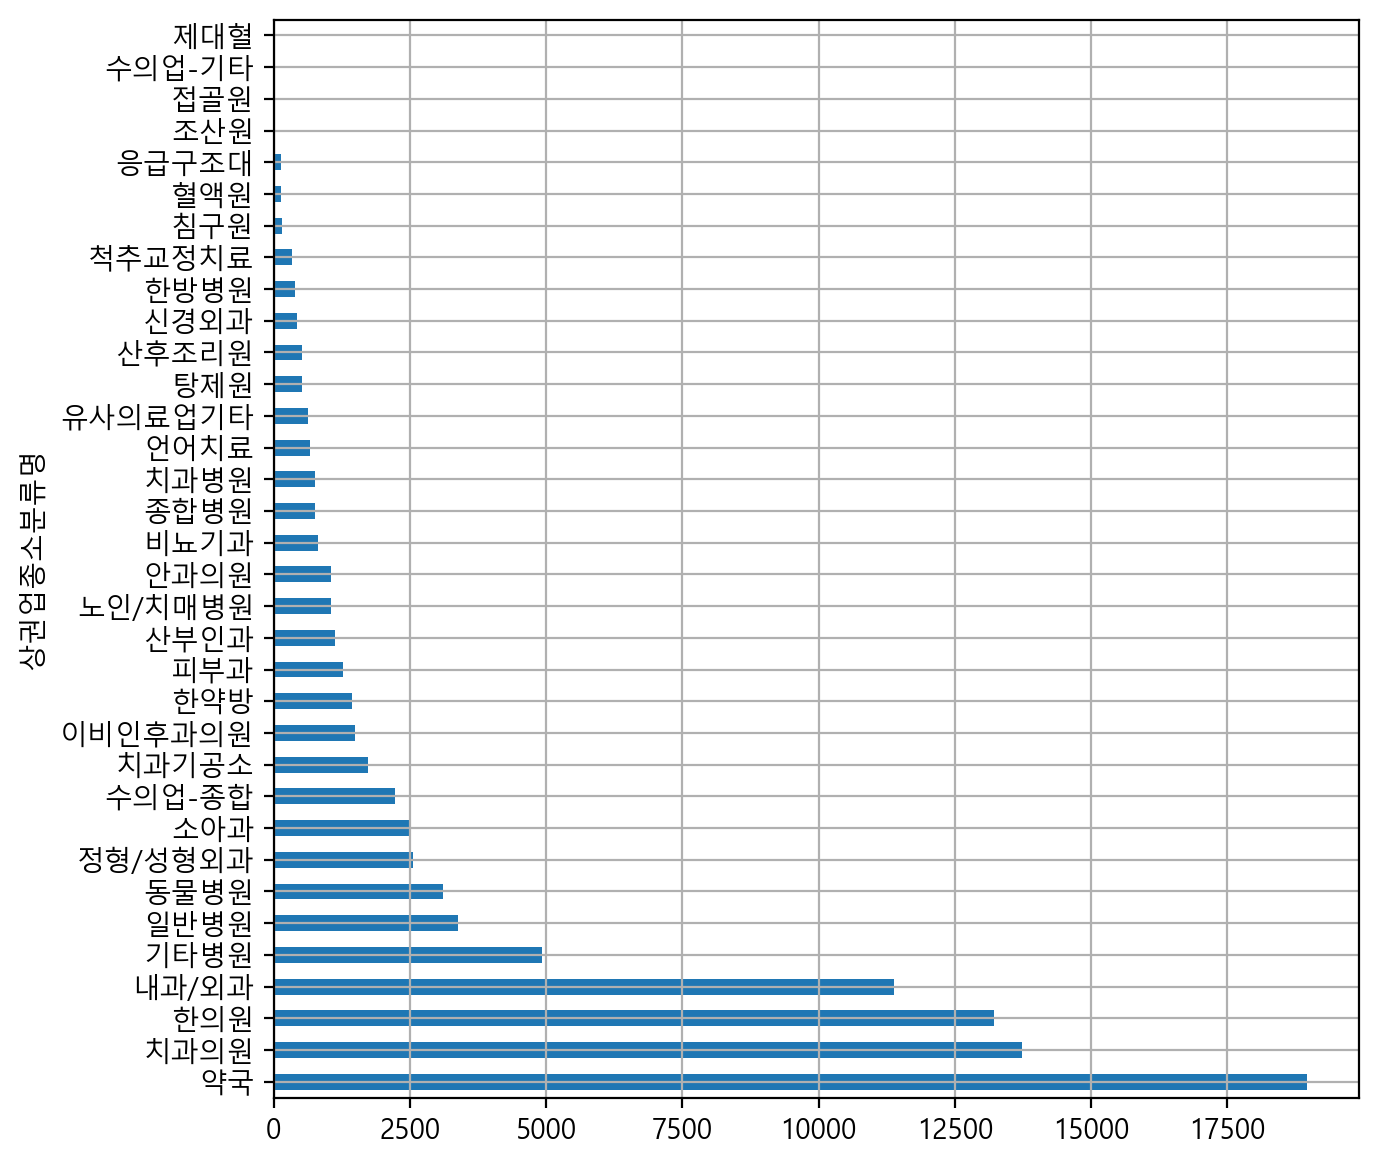

In [71]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
df["상권업종소분류명"].value_counts().plot.barh(figsize=(7, 7), grid=True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [73]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 df_medical에 저장
# df["상권업종중분류명"] == "약국/한약방"에 df[]을 덮어쓰면 해당 조건에 True인 데이터만 가져옵
df_medical = df[df["상권업종중분류명"] == "약국/한약방"]
df_medical.head(1)

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명  시도명    시군구코드  ...                    지번주소         도로명코드  \
4       약국  경기도  41465.0  ...  경기도 용인시 수지구 풍덕천동 712-2  414653205024   

               도로명  건물본번지                     건물관리번호               도로명주소  \
4  경기도 용인시 수지구 문정로     32  4146510100107120002026238  경기도 용인시 수지구 문정로 32   

      구우편번호    신우편번호          경도         위도  
4  448170.0  16837.0  127.095522  37.323528  

[1 rows x 29 columns]

In [74]:
# 상권업종대분류명이 의료인 데이터를 불러옵
df[df["상권업종대분류명"] == "의료"].head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
0  19956873  하나산부인과         S       의료       S01       병원    S01B10     산부인과   

   시도명    시군구코드  ...                  지번주소         도로명코드              도로명  \
0  경기도  41273.0  ...  경기도 안산시 단원구 선부동 1081  412733191011  경기도 안산시 단원구 달미로   

   건물본번지                     건물관리번호               도로명주소     구우편번호    신우편번호  \
0     10  4127310900110810000010857  경기도 안산시 단원구 달미로 10  425764.0  15236.0   

           경도         위도  
0  126.814295  37.336344  

[1 rows x 29 columns]

In [75]:
# loc 사용해 두 조건 붙임
# 상권업종대분류명이 의료인 데이터의 상권업종중분류명을 가져옴
df.loc[df["상권업종대분류명"] == "의료"]["상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [76]:
# 위와 같은 결과
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [77]:
# 조건에 맞는 데이터 갯수 출력
# "상권업종대분류명"의 "의료", "상권업종중분류명"의 value 갯수 출력
shop_type = df["상권업종대분류명"] == "의료"
df.loc[shop_type, "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [78]:
# 위와 똑같은 기능을 수행하는 코드
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [79]:
# "상권업종중분류명"이 "유사의료업"인 데이터만 df_medi에 저장
# df_medi의 행, 열의 수 출력
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [80]:
# "상호명"의 상위 10개의 데이터 출력
df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [81]:
# 유사의료업 중 "상호명"의 상위 10개를 출력
df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

### 여러 조건으로 색인하기

In [83]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옴 (AND 연산자)
df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") &
    (df["시도명"]== "서울특별시")]
df_seoul_drug.head(1)

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
33  20816709  이즈타워약         S       의료       S02   약국/한약방    S02A01       약국   

      시도명    시군구코드  ...               지번주소         도로명코드             도로명  \
33  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 821  116803122010  서울특별시 강남구 테헤란로   

    건물본번지                     건물관리번호               도로명주소     구우편번호   신우편번호  \
33    101  1168010100108210001000001  서울특별시 강남구 테헤란로 101  135080.0  6134.0   

            경도         위도  
33  127.028023  37.498656  

[1 rows x 29 columns]

### 구별로 보기

In [85]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
df_seoul_drug["시군구명"].value_counts()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: count, dtype: int64

In [86]:
# normalize=True 를 통해 비율을 구해봅니다.
df_seoul_drug["시군구명"].value_counts(normalize=True)

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: proportion, dtype: float64

<Axes: xlabel='시군구명'>

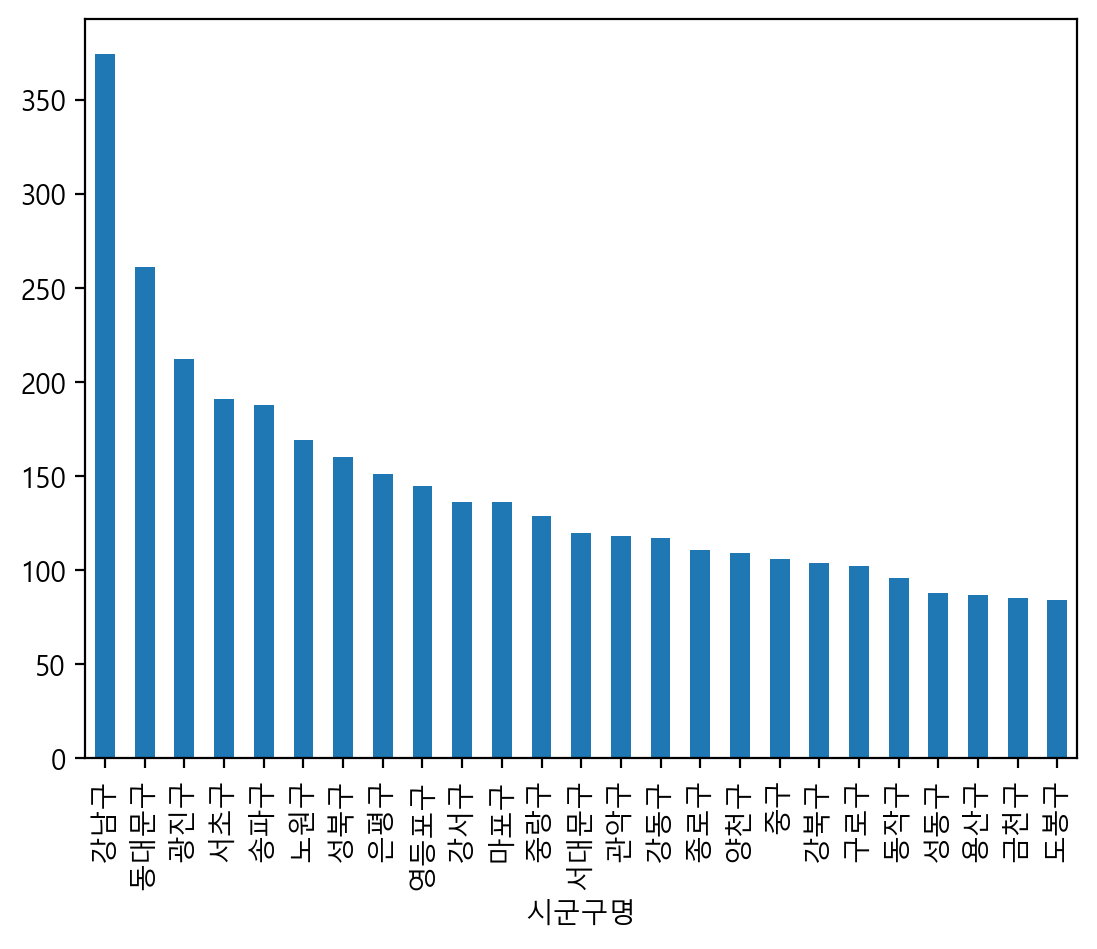

In [87]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
df_seoul_drug["시군구명"].value_counts().plot.bar()

In [88]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
df_seoul_hospital = df[
    (df["상권업종소분류명"] == "종합병원") &
    (df["시도명"]== "서울특별시")]
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
305     종합병원  서울특별시  11215.0  ...  서울특별시 광진구 중곡동 58-25  112153104006   

                도로명  건물본번지                     건물관리번호               도로명주소  \
305  서울특별시 광진구 긴고랑로    119  1121510100100580025000733  서울특별시 광진구 긴고랑로 119   

        구우편번호   신우편번호          경도         위도  
305  143220.0  4944.0  127.088279  37.559048  

[1 rows x 29 columns]

In [89]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

### 텍스트 데이터 색인하기

In [91]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 데이터 찾기
df[df["상호명"].str.contains("대학병원")].head(1)

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
193  23651380  동국대학병원일산         S       의료       S01       병원    S01B01   

    상권업종소분류명  시도명    시군구코드  ...                  지번주소         도로명코드  \
193     종합병원  경기도  41285.0  ...  경기도 고양시 일산동구 식사동 814  412853193010   

                  도로명  건물본번지                     건물관리번호                도로명주소  \
193  경기도 고양시 일산동구 동국로     27  4128510100108090004022480  경기도 고양시 일산동구 동국로 27   

        구우편번호    신우편번호          경도         위도  
193  410773.0  10326.0  126.805548  37.676425  

[1 rows x 29 columns]

In [92]:
# "상호명"에 "종합병원"이 들어간 데이터의 "상호명"을 중복 없이 가져옵
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [93]:
# "꽃배달"이 "상호명"에 포함된 데이터를 가져옵
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

상가업소번호            상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
2803  20895655  서울성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   
4644  22020310  강남성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   

     상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
2803     종합병원  서울특별시  11650.0  ...    서울특별시 서초구 반포동 551  116504163330   
4644     종합병원  서울특별시  11650.0  ...  서울특별시 서초구 반포동 547-6  116504163242   

                    도로명  건물본번지                     건물관리번호  \
2803  서울특별시 서초구 사평대로28길     55  1165010700105510000017194   
4644  서울특별시 서초구 반포대로39길     56  1165010700105470006016762   

                        도로명주소     구우편번호   신우편번호          경도         위도  
2803     서울특별시 서초구 사평대로28길 55  137040.0  6578.0  127.000682  37.498257  
4644  서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  127.001756  37.499095  

[2 rows x 29 columns]

In [94]:
# 상호명에 여러개의 데이터(꽃배달, 의료기, 장례식장, 상담소, 어린이집)이 들어간 데이터의 인덱스 번호를 리스트 형태로 변형
drop_row = df_seoul_hospital[
df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [95]:
# 상호명에 "의원"이 들어간 데이터의 인덱스 번호를 리스트 형태로 변형
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index

drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [96]:
# drop_row와 drop_row2의 데이터 합침
drop_row = drop_row + drop_row2
len(drop_row)

33

In [97]:
# drop_row에 들어있는 index 번호에 해당하는 행을 제거
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<Axes: xlabel='시군구명'>

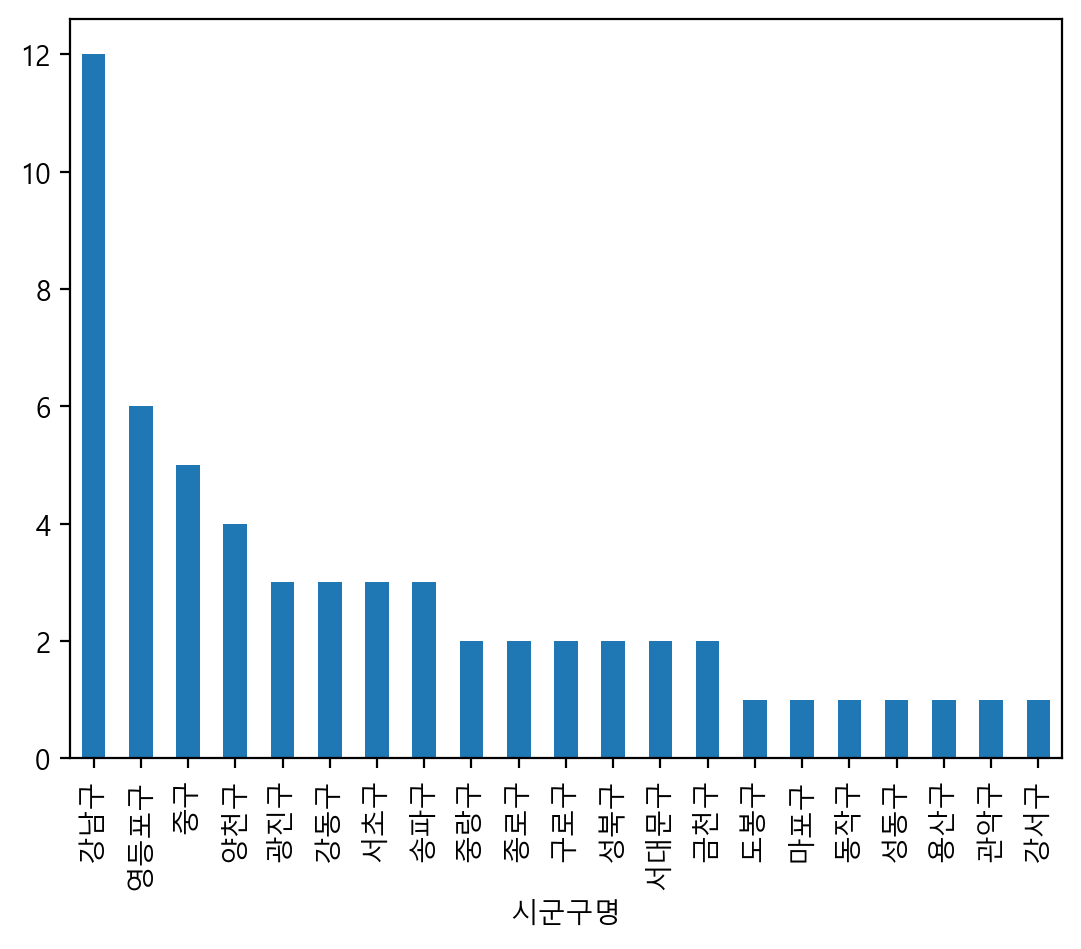

In [98]:
# 막대그래프
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<Axes: xlabel='시군구명', ylabel='count'>

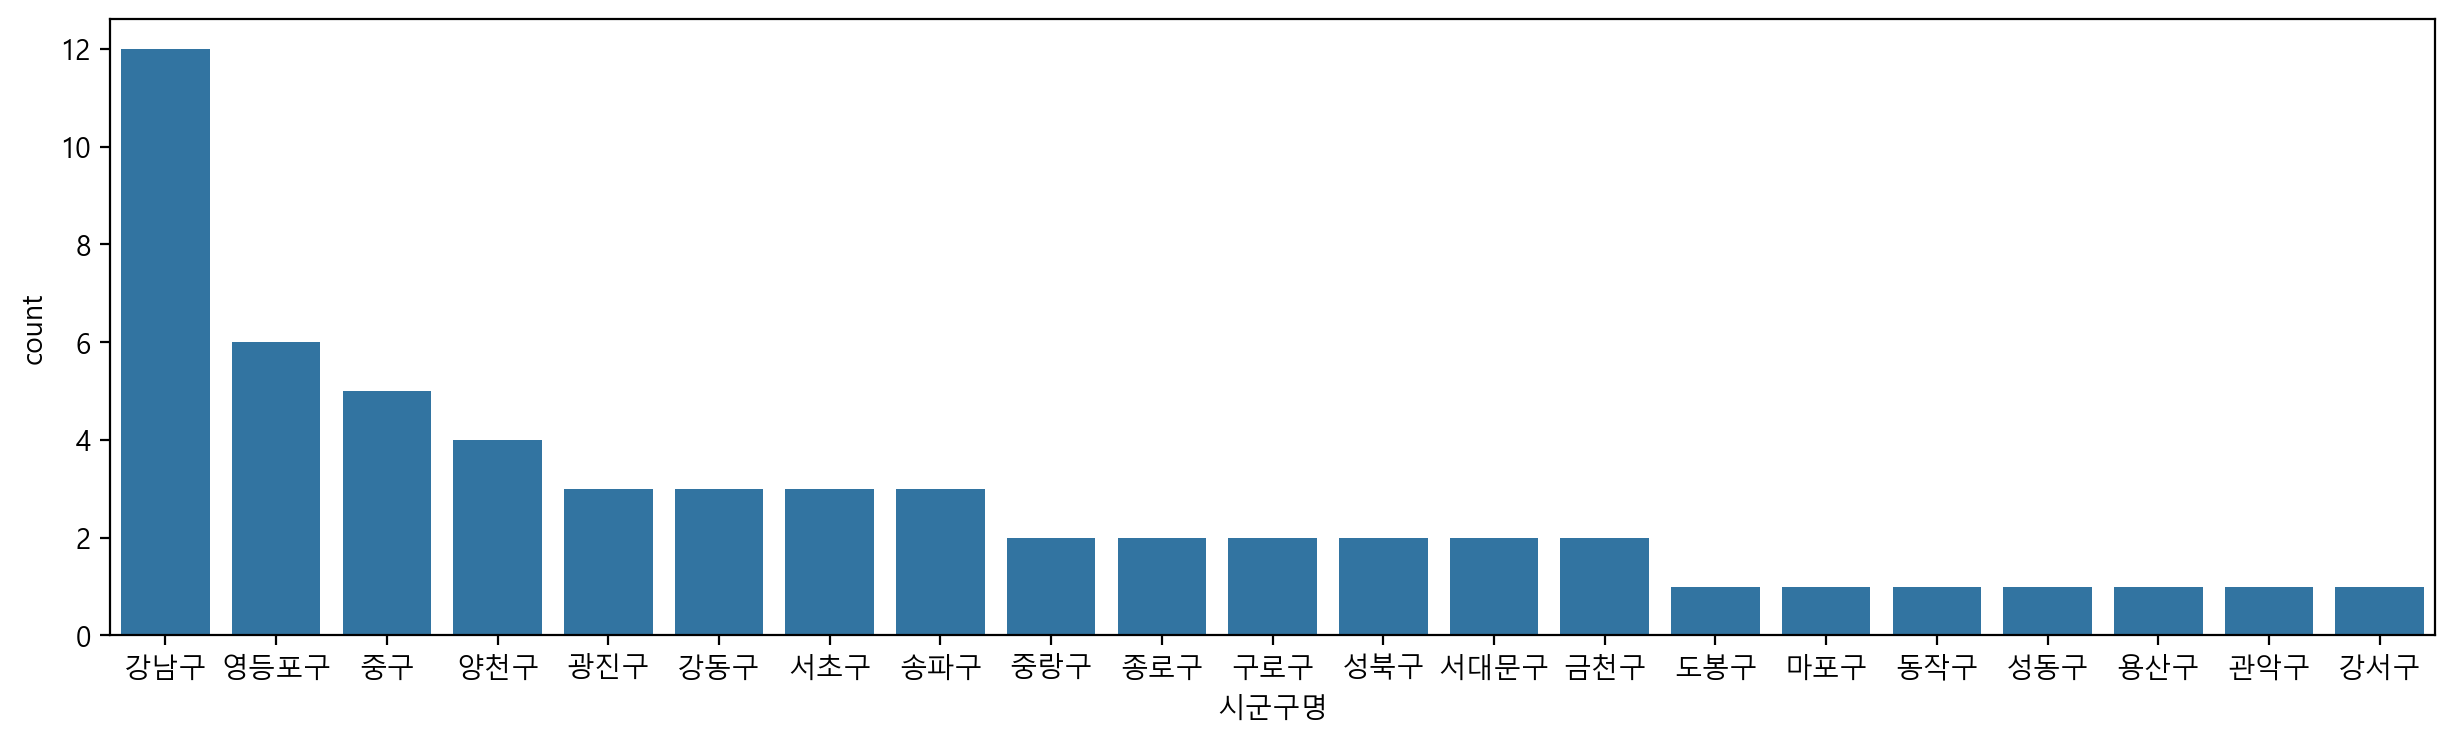

In [99]:
# seaborn으로 데이터 시각화
plt.figure(figsize=(15, 4))  # 그래프 사이즈 조정
sns.countplot(data=df_seoul_hospital, x="시군구명",
             order=df_seoul_hospital["시군구명"].value_counts().index)

In [100]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.
df[df["도로명주소"].str.startswith("서울")].head(1)

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
1  20024149  타워광명내과의원         S       의료       S01       병원    S01B07   

  상권업종소분류명    시도명    시군구코드  ...                  지번주소         도로명코드  \
1    내과/외과  서울특별시  11680.0  ...  서울특별시 강남구 도곡동 467-14  116804166604   

                도로명  건물본번지                     건물관리번호                도로명주소  \
1  서울특별시 강남구 언주로30길     39  1168011800104670014000001  서울특별시 강남구 언주로30길 39   

      구우편번호   신우편번호          경도         위도  
1  135270.0  6292.0  127.053198  37.488742  

[1 rows x 29 columns]

In [101]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.
df[df["상호명"].str.endswith("병원")].head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
5  20809147  행신동물병원         S       의료       S04      수의업    S04A02     동물병원   

   시도명    시군구코드  ...                    지번주소         도로명코드              도로명  \
5  경기도  41281.0  ...  경기도 고양시 덕양구 행신동 647-14  412813192072  경기도 고양시 덕양구 행신로   

   건물본번지                     건물관리번호                도로명주소     구우편번호    신우편번호  \
5    147  4128112800106470014011094  경기도 고양시 덕양구 행신로 147  412220.0  10517.0   

           경도         위도  
5  126.831632  37.619309  

[1 rows x 29 columns]

### 특정 지역만 보기

In [103]:
# 서울특별시의 데이터만 df_seoul에 저장
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

In [104]:
# 서울시의 구의 데이터 갯수 세기 (가게 갯수)
df_seoul["시군구명"].value_counts().head()

시군구명
강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
Name: count, dtype: int64

<Axes: xlabel='시군구명'>

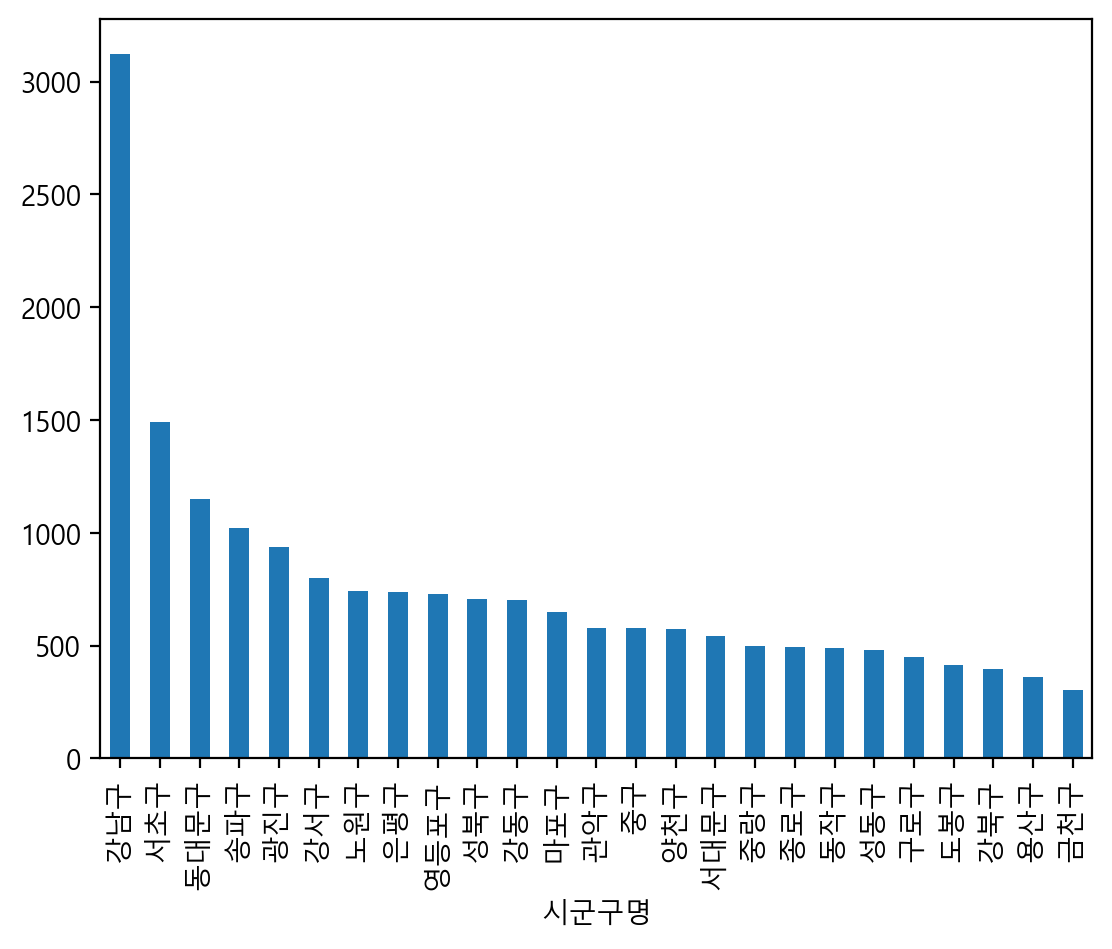

In [105]:
# 위의 데이터를 막대 그래프로 그리기
df_seoul["시군구명"].value_counts().plot.bar()

<Axes: xlabel='count', ylabel='시군구명'>

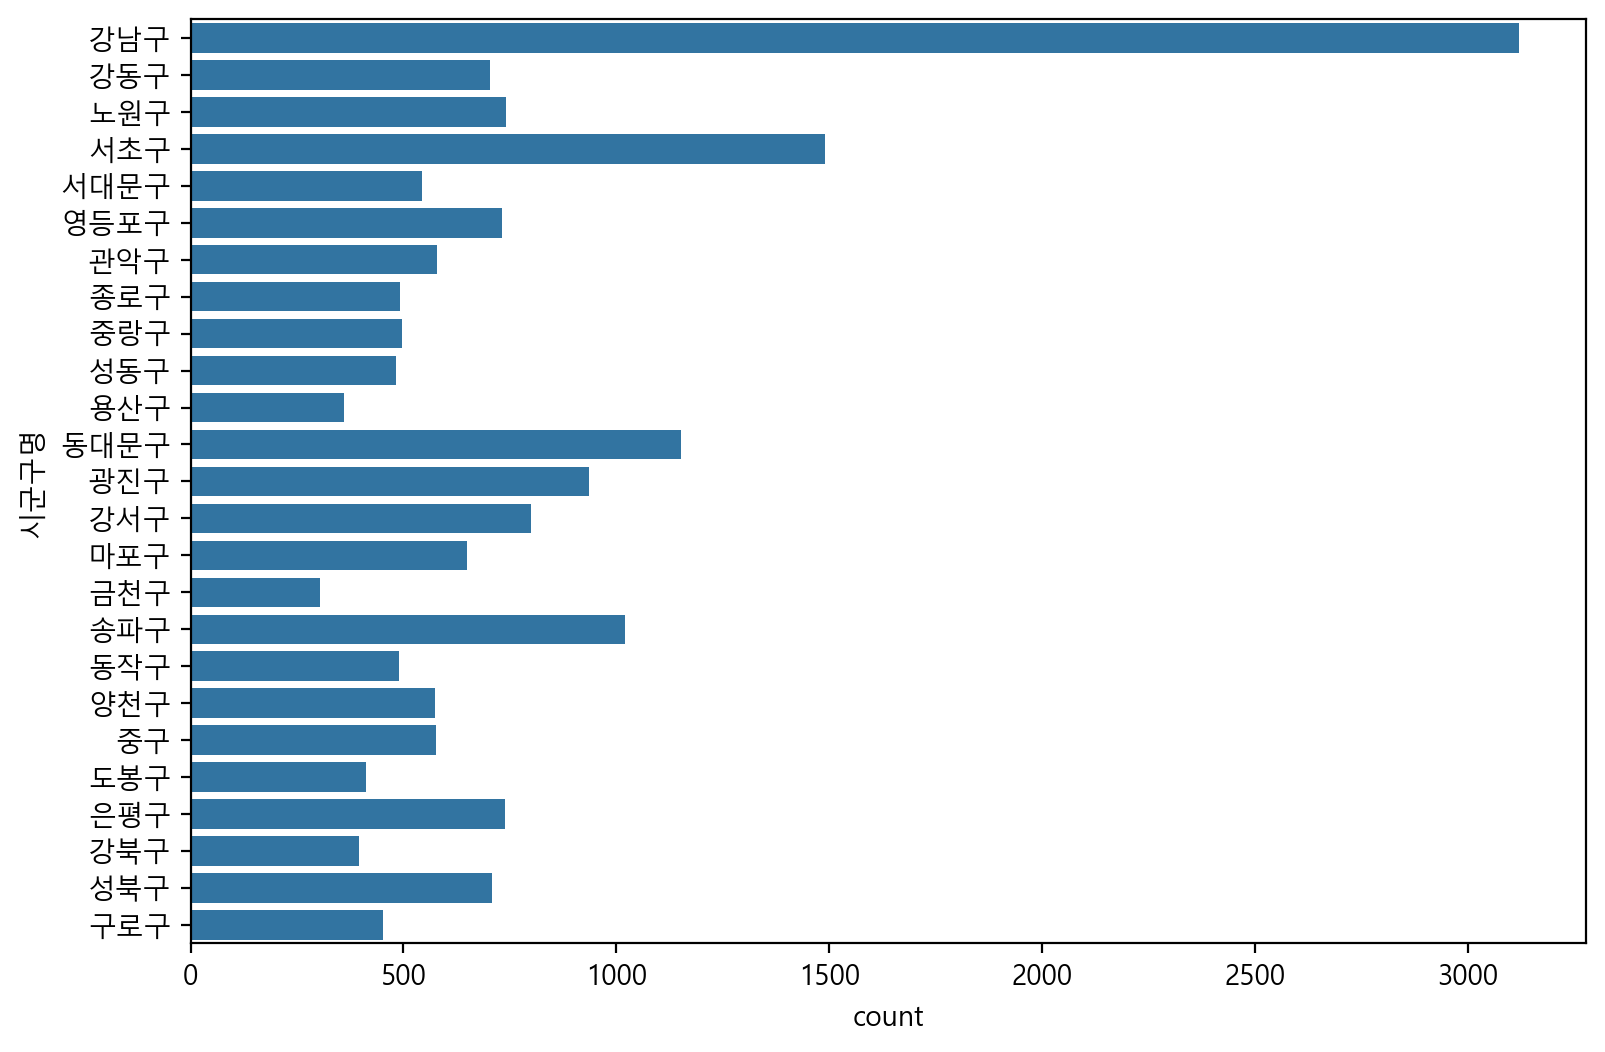

In [106]:
# seaborn의 countplot 사용해 df_seoul의 시군구명 시각화
plt.figure(figsize=(9, 6))
sns.countplot(data=df_seoul, y="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

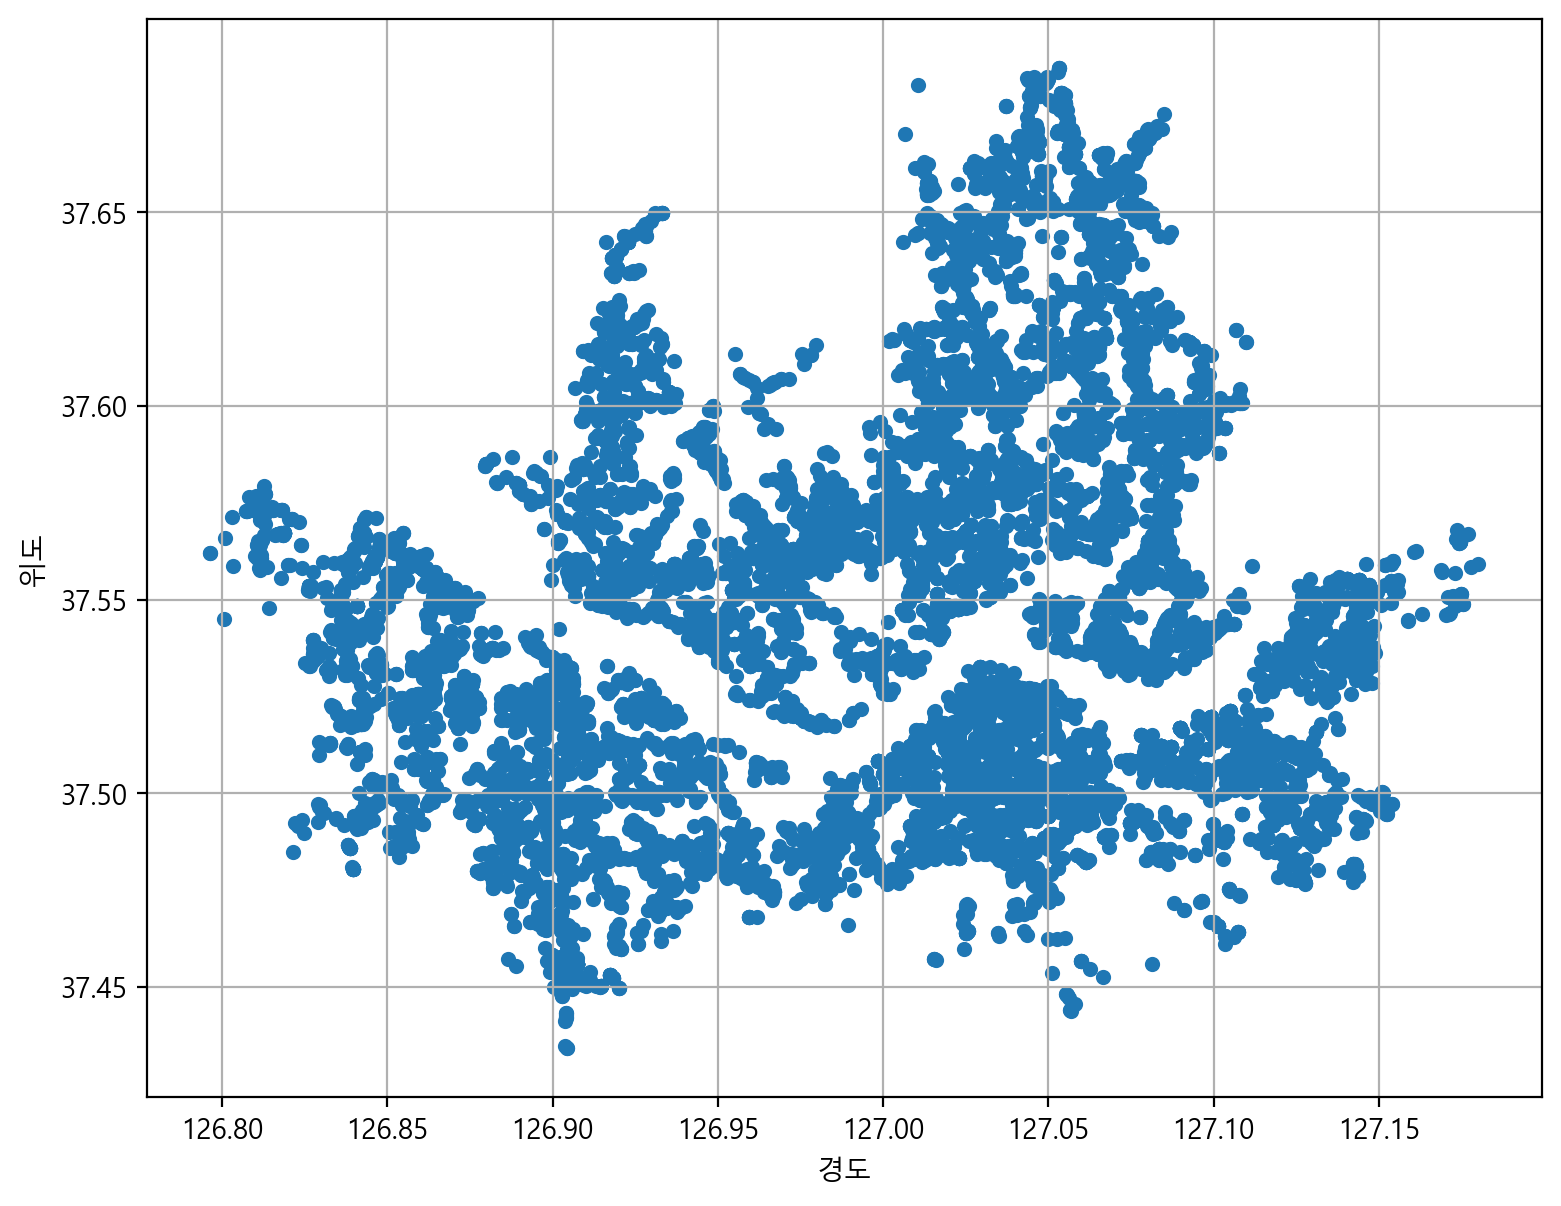

In [107]:
# Pandas 의 plot.scatter(수치형 데이터 시각화) 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

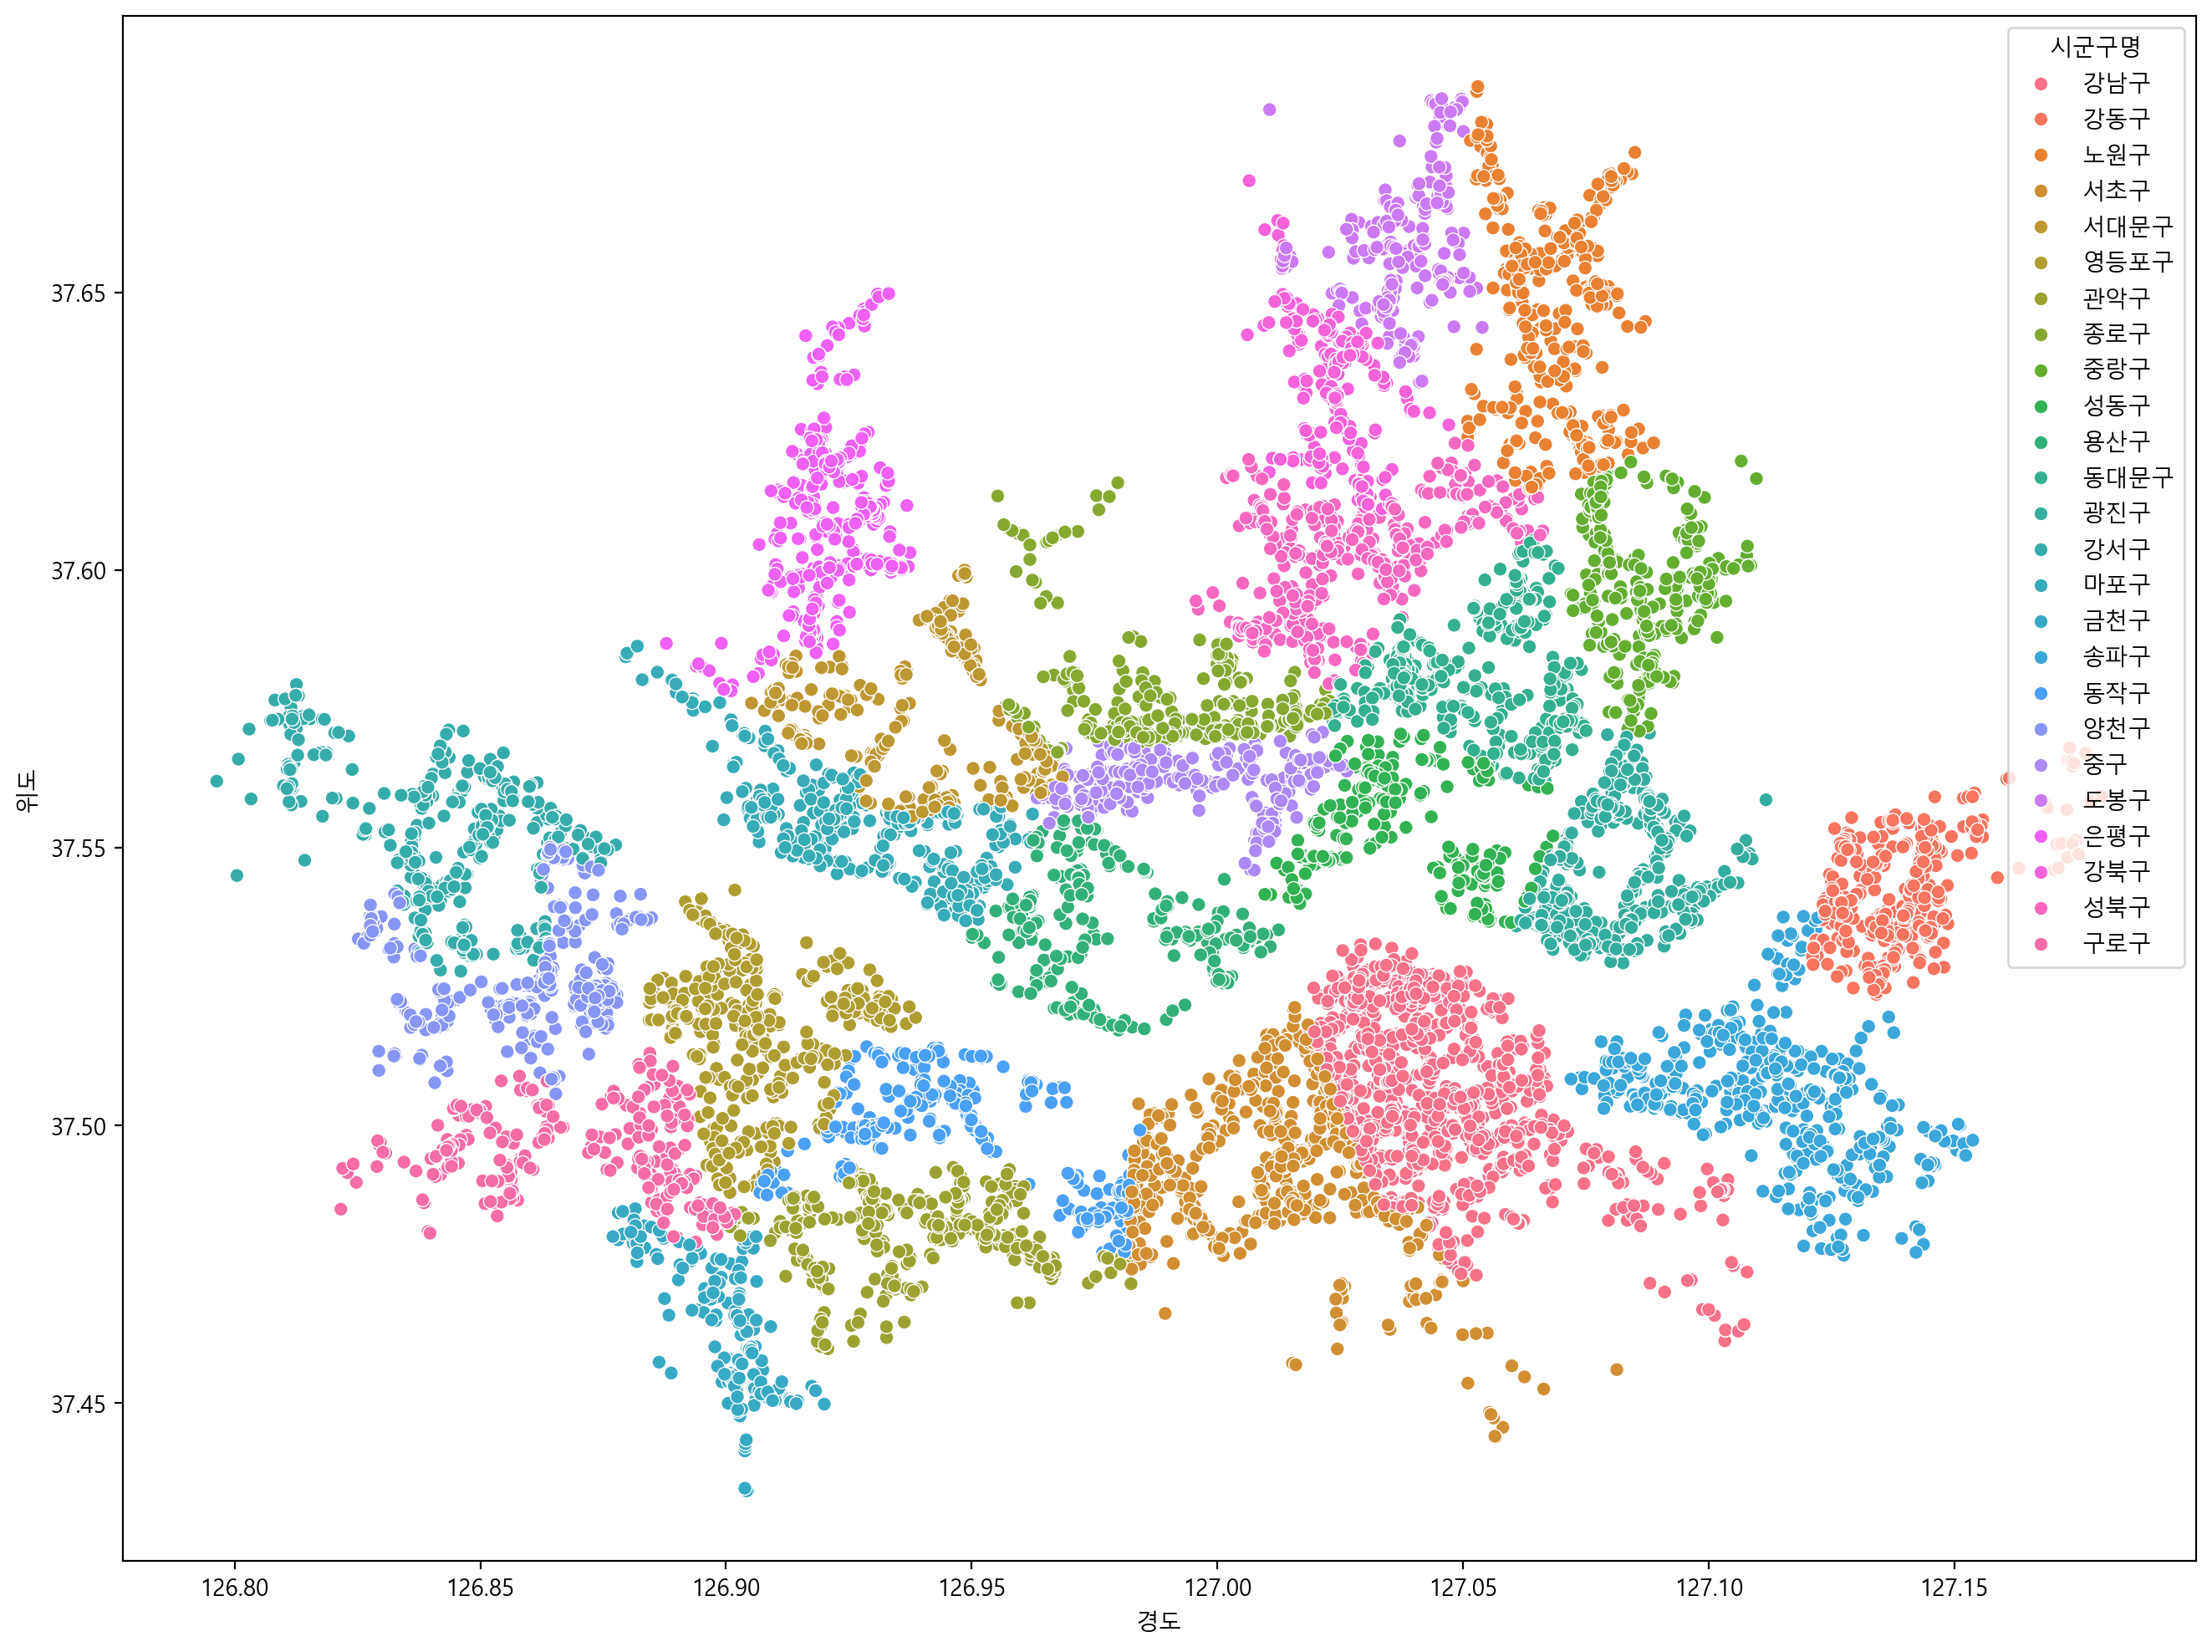

In [108]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
# hue: 각 "시군구명"을 다른 색상으로 표시
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,
                x='경도', y='위도', hue='시군구명')

<Axes: xlabel='경도', ylabel='위도'>

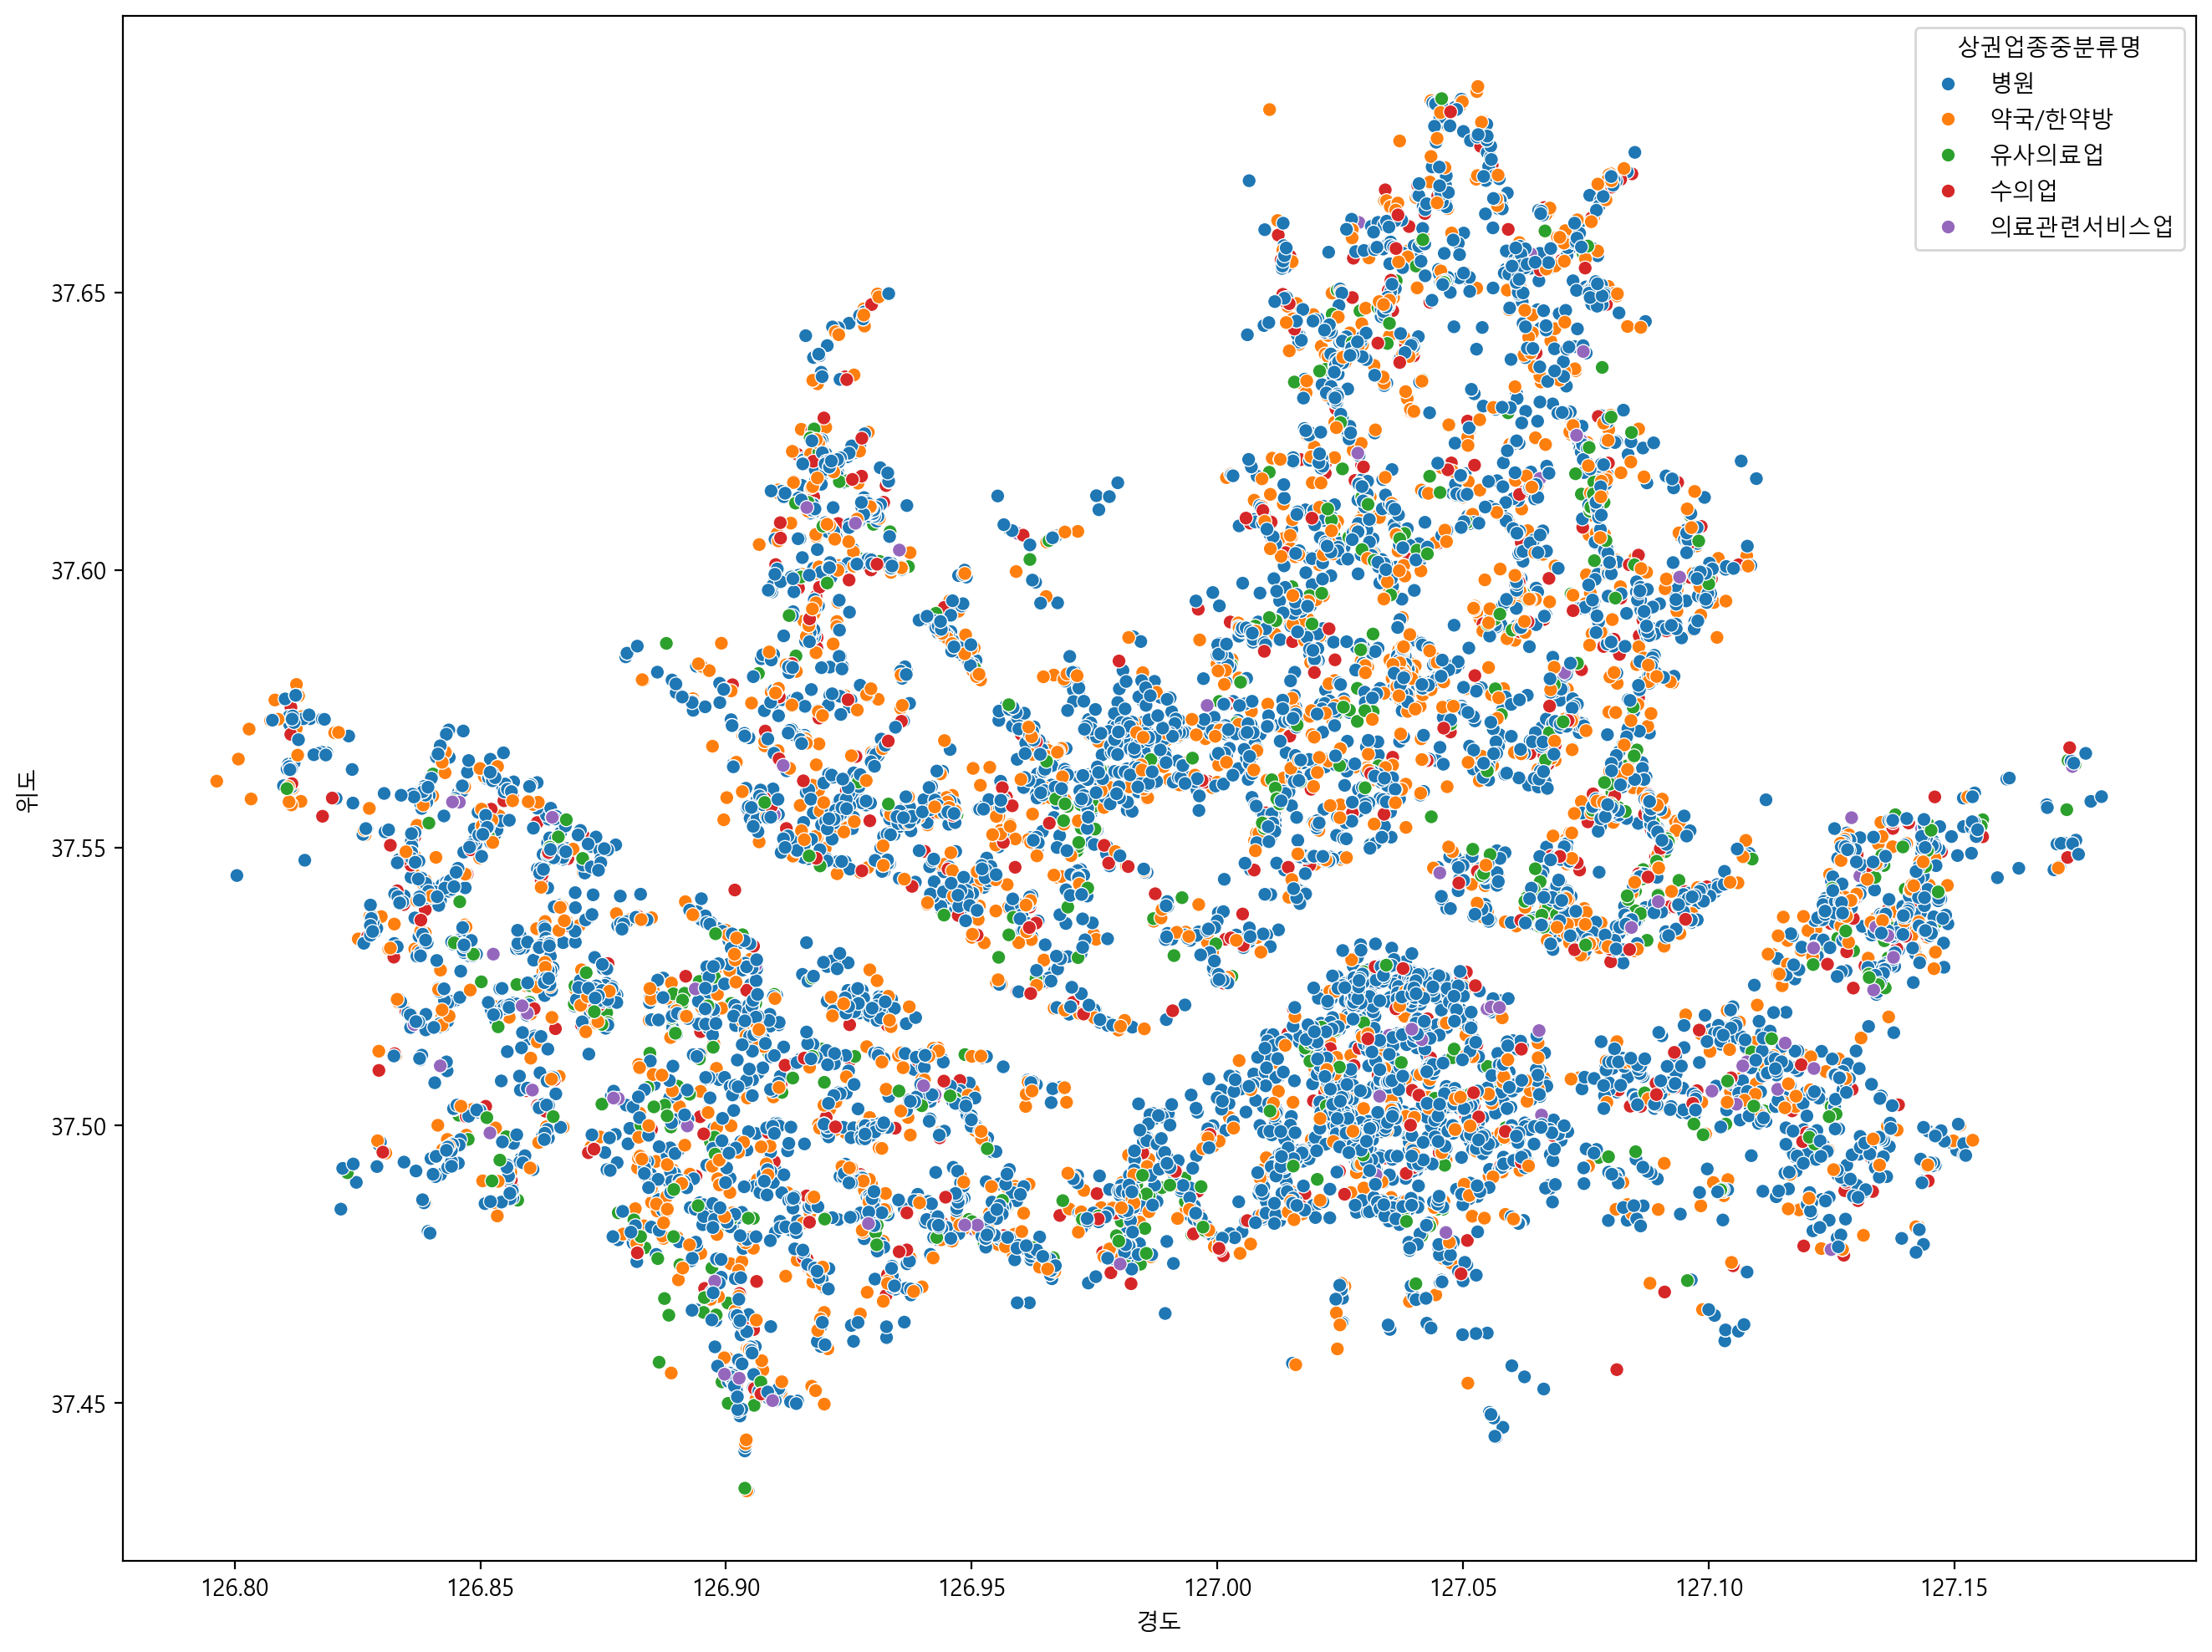

In [109]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,
                x='경도', y='위도', hue="상권업종중분류명")

<Axes: xlabel='경도', ylabel='위도'>

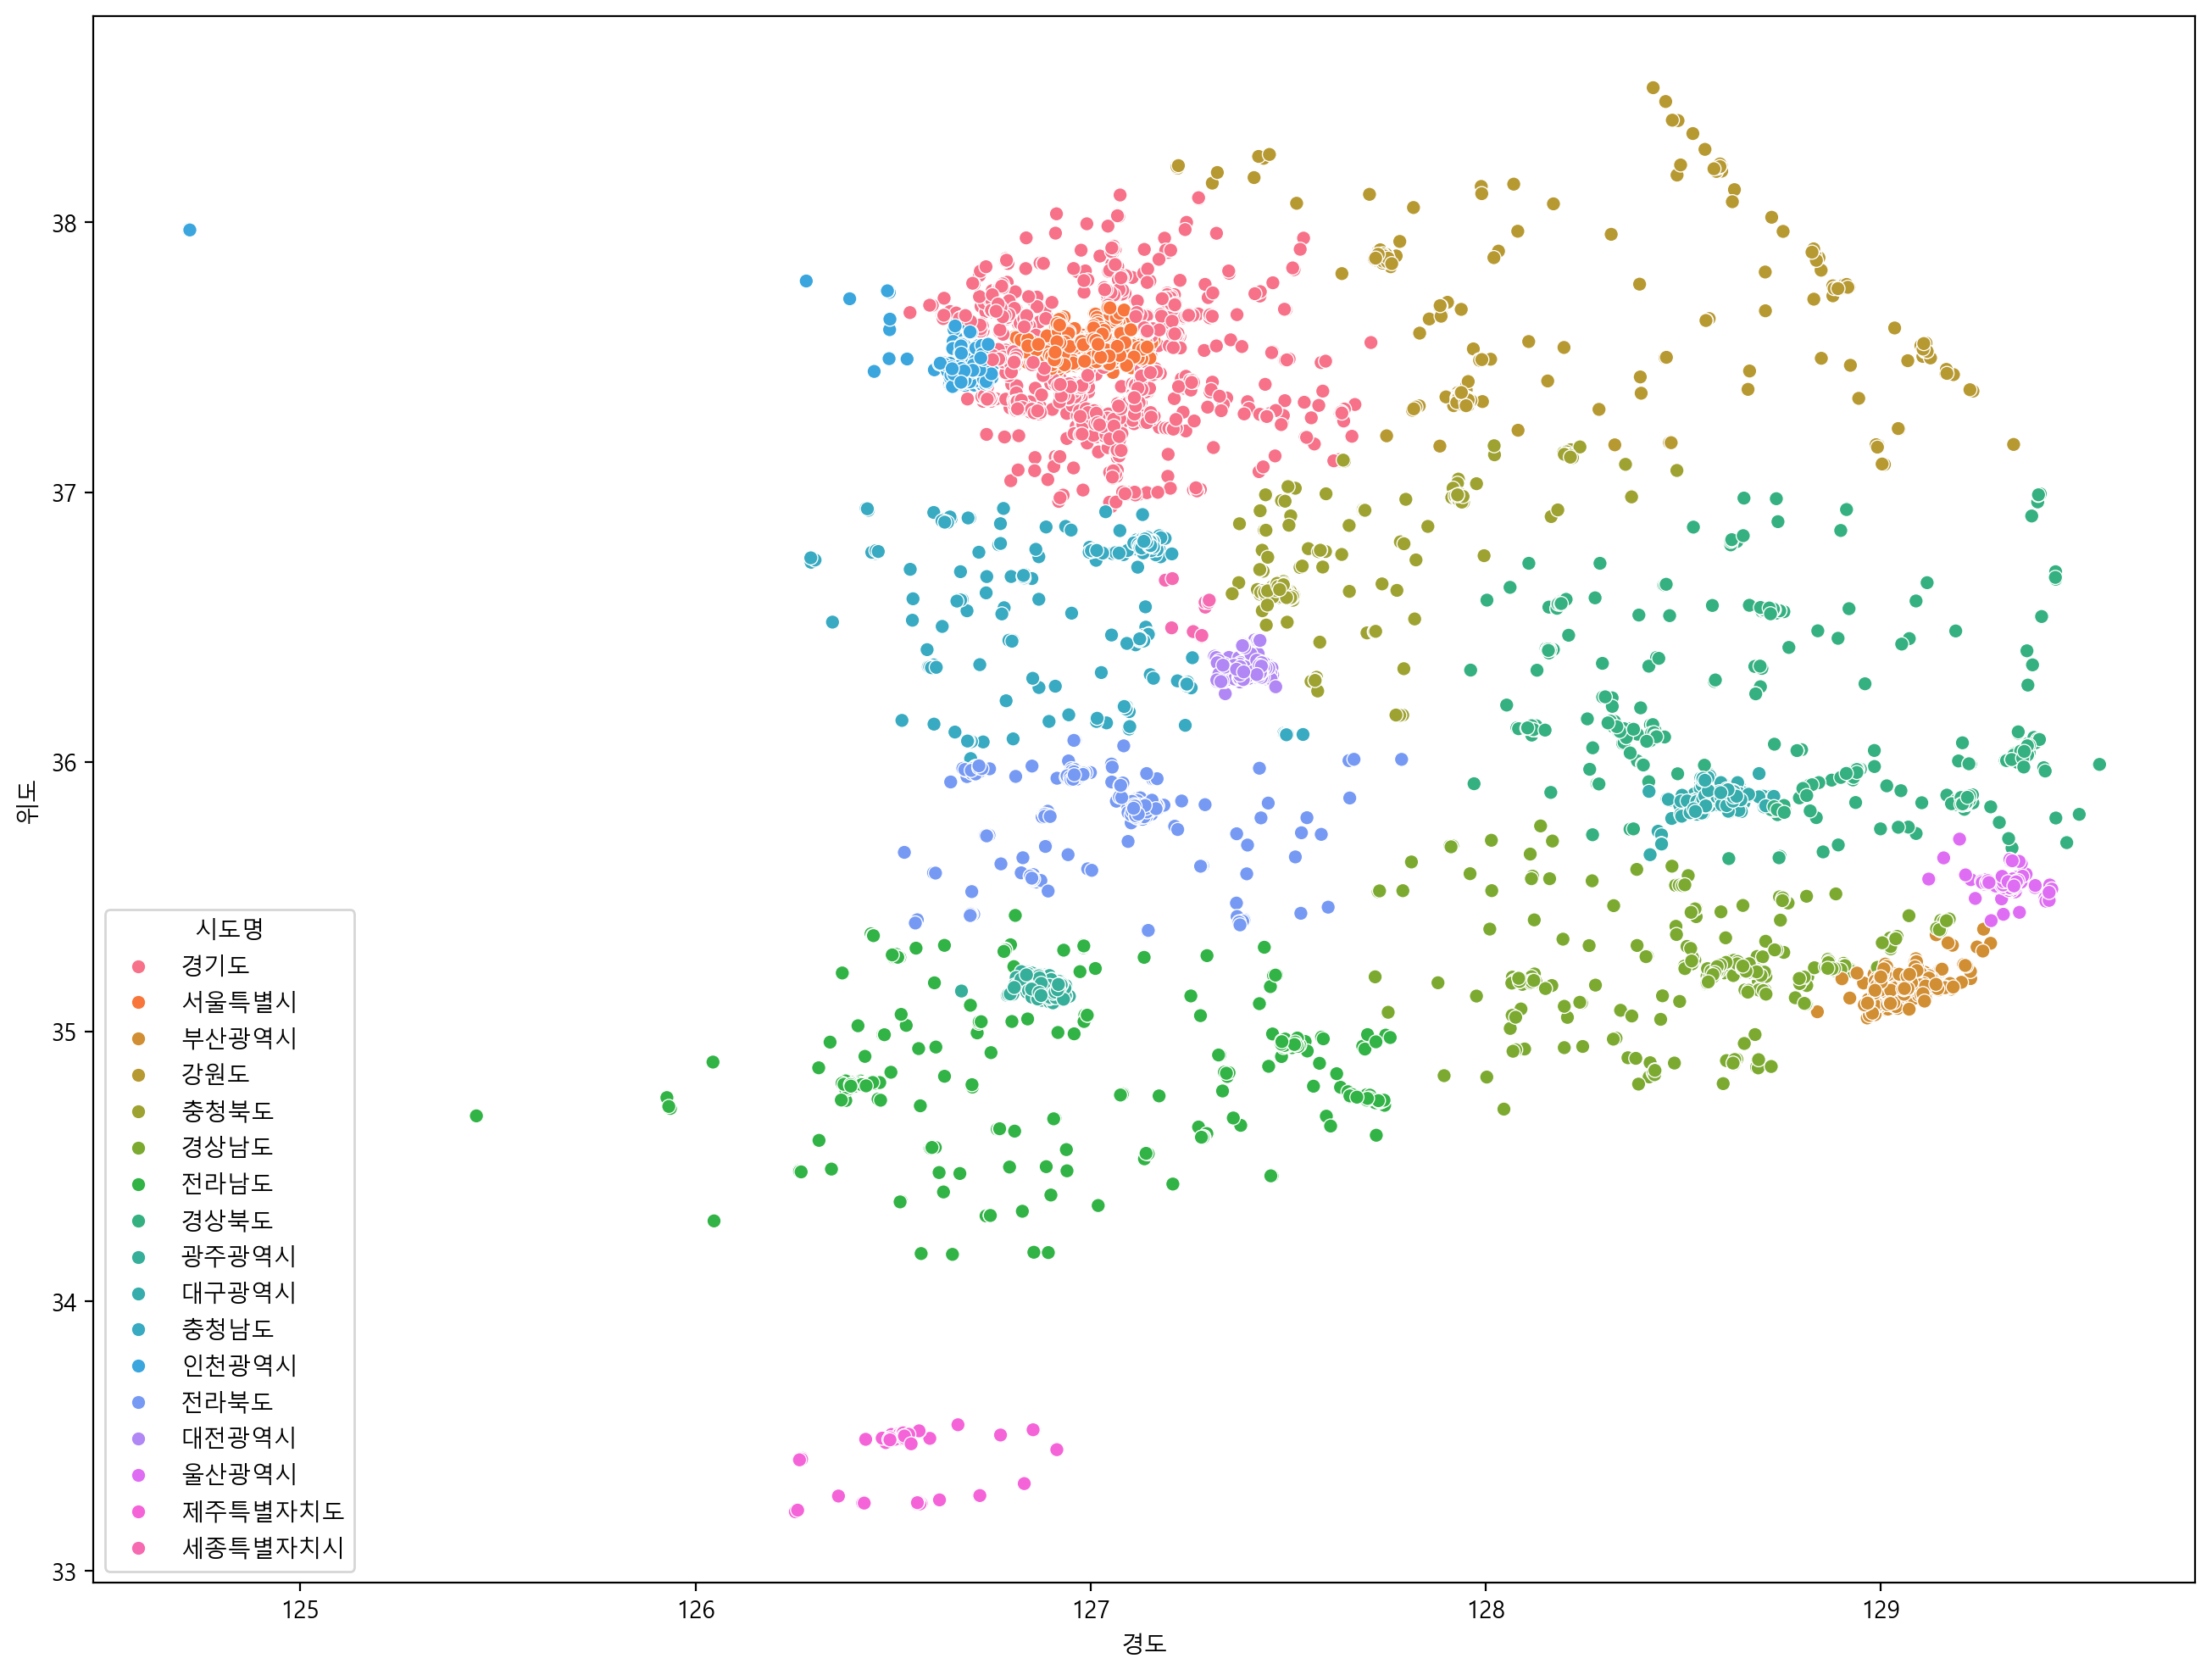

In [110]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df[:10000],
                x='경도', y='위도', hue='시도명')


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [112]:
# 지도 시각화를 위한 라이브러리
import folium

In [113]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589356625

In [114]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당
geo_df = df_seoul_hospital.copy()

In [115]:
# 지도의 중심을 geo_df의 위도와 경도의 평균으로 지정
# zoom_start: 클수록 줌인
fmap = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12)

for n in geo_df.index:
    # 팝업의 텍스트를 상호명과 주소를 붙여서 출력
    # loc: 행 기준 
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']

    folium.Marker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        popup=popup_name,
        tooltip=popup_name
    ).add_to(fmap)


fmap

## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시)
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?